# Melbourne Housing Price Analysis

Welcome to my Melbourne Housing Price Analysis, In this notebook i will take you on a journey through the captivating world of Melbourne's real estate market. Melbourne's are known for it's diverse neighbourhoods and vibrant lifestyle, offers a unique landscape for property buyers and investors.

# Dataset Overview:

The cornerstone of this analysis is the Melbourne Housing Price Dataset, which I found on Kaggle. This publicly available dataset provides a comprehensive snapshot of the housing market in Melbourne, capturing key details about properties, their attributes, and their corresponding selling prices.

**Dataset Details:**
- **Name:** Melbourne Housing Snapshot
- **Source:** [Kaggle](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot)
- **Description:** This dataset contains many rich features that related to the residential properties, including the number of bedrooms, residential types, num of bathrooms, num of car spots, price, distance from CBD (Central Business District), suburb, region name, land size, building area, council area. 

**Dataset Variables:**
- `Rooms`: Number of rooms
- `Bedroom`: Number of bedrooms
- `Type`: br - bedroom(s), h - house,cottage,villa, semi,terrace, u - unit, duplex, t - townhouse, dev site - development site, o res - other residential.
- `Method`: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- `Bathroom`: Number of bathrooms
- `Cars`: Number of car spots
- `Price`: Price in dollars
- `Distance`: Distance from CBD (Central Business District)
- `Region Name`: General Region (West, North West, North, North east …etc)
- `Land Size`: Land Size
- `Building Area`: Building Size
- `Council Area`: Governing Council for the Area

Please note that this analysis is conducted solely for analytical purposes and does not involve any proprietary or confidential data. It was scraped from publicly available results posted every week from [Domain](https://www.domain.com.au/).

# Goal for the Analysis: 

The primary goal for this analysis is to gain and develop a predictive model that can accurately estimate and predict the housing price in Melbourne based on various features.


**Conclusion:**
- **Thorough Data Analysis:** Conducted comprehensive data cleaning, preprocessing, exploratory analysis, and employed advanced regression modeling techniques.

- **Identify Key Influences:** Aim to pinpoint the crucial factors impacting housing prices.

- **Reliable Predictive Models:** Ensured our models were dependable and evaluated their performance rigorously.

- **Accurate Predictions:** Developed precise predictive models for estimating housing prices based on property attributes.

- **Informed Decision-Making:** Provide actionable insights to support informed decisions in Melbourne's real estate market.

<br>

# Importing the Libary

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

import statsmodels.api as sm 

from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error as rmse 
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_percentage_error as mape 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# Data Preprocessing:

In [2]:
pd.set_option('display.max_columns', 21)
housing = pd.read_csv('melb_data.csv')

housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
housing.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
housing['Date'] = pd.to_datetime(housing['Date'])

housing['Date'].dtypes

C:\Users\WIN - 10\AppData\Local\Temp\ipykernel_34268\1850932594.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  housing['Date'] = pd.to_datetime(housing['Date'])


dtype('<M8[ns]')

In [7]:
housing.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
dtype: object

In [8]:
housing['Postcode'].unique()

array([3067., 3042., 3206., 3078., 3018., 3025., 3143., 3032., 3147.,
       3034., 3183., 3103., 3104., 3204., 3165., 3128., 3019., 3186.,
       3187., 3056., 3055., 3105., 3125., 3124., 3126., 3054., 3163.,
       3162., 3161., 3148., 3068., 3058., 3066., 3108., 3084., 3185.,
       3184., 3040., 3041., 3065., 3031., 3011., 3146., 3046., 3043.,
       3188., 3122., 3081., 3166., 3079., 3021., 3033., 3101., 3102.,
       3144., 3012., 3145., 3000., 3127., 3039., 3189., 3015., 3051.,
       3070., 3167., 3052., 3044., 3207., 3181., 3072., 3073., 3121.,
       3205., 3141., 3006., 3182., 3020., 3107., 3071., 3142., 3087.,
       3003., 3016., 3085., 3013., 3057., 3061., 3053., 3002., 3060.,
       3123., 3047., 3083., 3008., 3153., 3193., 3806., 3155., 3088.,
       3023., 3151., 3192., 3064., 3977., 3136., 3175., 3089., 3172.,
       3109., 3111., 3754., 3095., 3076., 3131., 3199., 3200., 3437.,
       3803., 3777., 3190., 3037., 3038., 3173., 3075., 3093., 3337.,
       3082., 3132.,

In [9]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [10]:
# data_types = {'Postcode':'int64',
#               'Bathroom': 'int64',
#               'Car': 'int64',
#               'YearBuilt': 'int64'}

# housing = housing.astype(data_types)

# print(housing.dtypes)


housing['Postcode'] = housing['Postcode'].astype('int64')
housing['Bathroom'] = housing['Bathroom'].astype('int64')
# housing['Car'] = housing['Car'].astype('int64')
# housing['YearBuilt'] = housing['YearBuilt'].astype('int64')

It appears that our dataset misread the datatypes, which is why i get an error when i want to cast the `Car` and `Yearbuilt` column into `int64` which wont work as well because the data has a `0` or `Null` values inside the column values. So the way we're gonna handle this issues is i'm gonna inpute the values with mean, but first we're going to see the values outliers before we do further data cleaning 

(array([1.026e+03, 5.509e+03, 5.591e+03, 7.480e+02, 5.060e+02, 6.300e+01,
        5.400e+01, 8.000e+00, 9.000e+00, 4.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

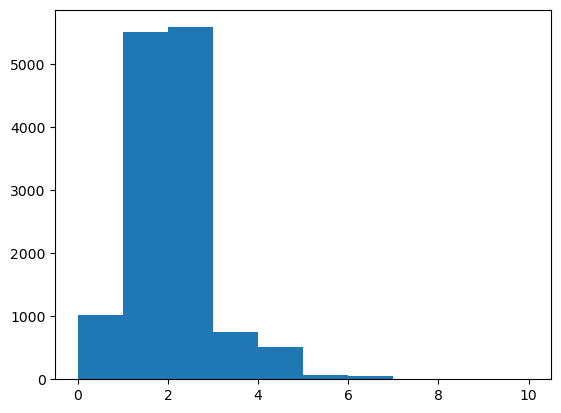

In [11]:
plt.hist(housing['Car'])

In [12]:
housing['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

it seems like our `Car` values are right skew and the most frecuency falls into range of `0-3` car spots. In this matter we're going to impute the `0.0` value with the `Median` since the value shows right skewed data.

In [13]:
median_car = housing['Car'].median()
housing['Car'].fillna(median_car, inplace=True)

In [14]:
housing['Car'].value_counts()

2.0     5653
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

(array([1.026e+03, 5.509e+03, 5.653e+03, 7.480e+02, 5.060e+02, 6.300e+01,
        5.400e+01, 8.000e+00, 9.000e+00, 4.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

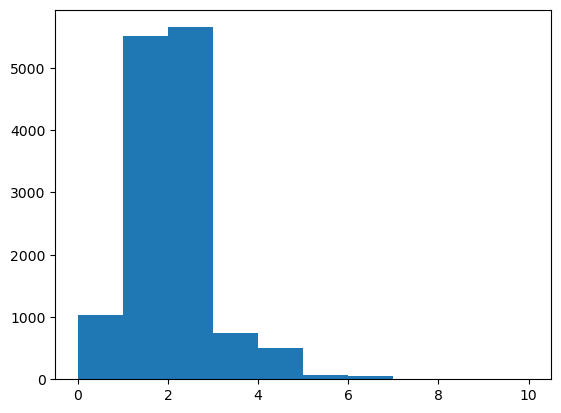

In [15]:
plt.hist(housing['Car'])

with the visualization shown above, our `Car` column values are changing it's values especially the car spots of 2.0 which is the common standard imputation method. So this imputation will do just fine.

In [16]:
housing[housing['YearBuilt'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067,2.0,1,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067,3.0,2,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067,2.0,1,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,2016-08-10,2.5,3067,1.0,1,1.0,0.0,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,2016-12-11,2.5,3067,2.0,2,1.0,0.0,NaN,NaN,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13566,Vermont South,9 Winswood Cl,4,h,1250000.0,PI,Philip,2017-08-26,17.2,3133,4.0,2,2.0,986.0,NaN,NaN,NaN,-37.84679,145.20051,Eastern Metropolitan,4280.0
13567,Viewbank,149 Graham Rd,5,h,1316000.0,SP,Nelson,2017-08-26,8.9,3084,5.0,3,3.0,696.0,NaN,NaN,NaN,-37.73501,145.08341,Eastern Metropolitan,2698.0
13569,Wantirna South,12 Armagh Cr,4,h,1323000.0,S,Barry,2017-08-26,14.7,3152,4.0,2,2.0,551.0,NaN,NaN,NaN,-37.87608,145.22390,Eastern Metropolitan,7082.0
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,2017-08-26,14.7,3152,3.0,2,2.0,674.0,NaN,NaN,NaN,-37.88360,145.22805,Eastern Metropolitan,7082.0


Our `YearBuilt` column has the simmilar case of `Car` column also. So we're going to impute this matter with fitting the median of the Data so that our dataset quality's on track, since `YearBuilt` would be the best predictor of our price of Melbourne Housing Price. 

In [17]:
# Before imputation
missing_before = housing['YearBuilt'].isna().sum()

print(f"Missing Values Before Imputation: {missing_before}")

Missing Values Before Imputation: 5375


In [18]:
year_counts = housing['YearBuilt'].value_counts().sort_index()

first_year = year_counts.index[0]
recent_year = year_counts.index[-1]

print(f"First Year Built: {first_year}")
print(f"Most Recent Year Built: {recent_year}")

First Year Built: 1196.0
Most Recent Year Built: 2018.0


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 1.813e+03, 6.386e+03]),
 array([1196. , 1278.2, 1360.4, 1442.6, 1524.8, 1607. , 1689.2, 1771.4,
        1853.6, 1935.8, 2018. ]),
 <BarContainer object of 10 artists>)

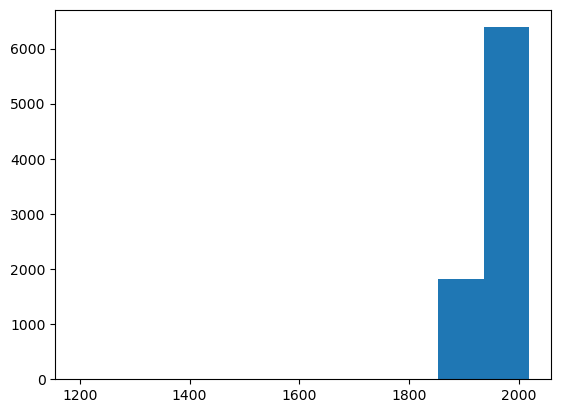

In [19]:
plt.hist(housing['YearBuilt'])

In [20]:
median_year_built = housing['YearBuilt'].median()
housing['YearBuilt'].fillna(median_year_built, inplace=True)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.0000e+00, 1.8130e+03, 1.1761e+04]),
 array([1196. , 1278.2, 1360.4, 1442.6, 1524.8, 1607. , 1689.2, 1771.4,
        1853.6, 1935.8, 2018. ]),
 <BarContainer object of 10 artists>)

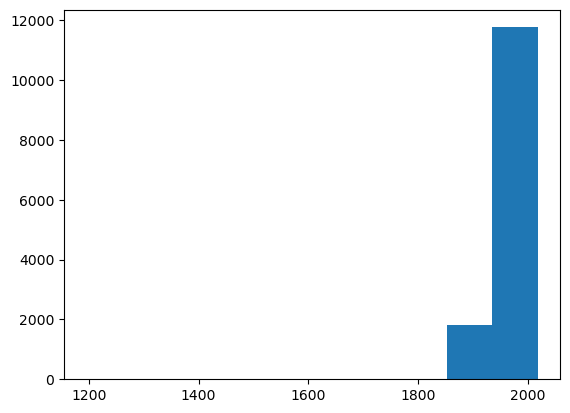

In [21]:
plt.hist(housing['YearBuilt'])

In [22]:
# Before imputation
# missing_before = housing['YearBuilt'].isna().sum()

# After imputation
missing_after = housing['YearBuilt'].fillna(median_year_built).isna().sum()

# print(f"Missing Values Before Imputation: {missing_before}")
print(f"Missing Values After Imputation: {missing_after}")

Missing Values After Imputation: 0


And yes! our `YearBuilt` NaN values are successfully working by imputing with filling the NaN values with median. 

In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      1358

- Clean the `BuildingArea` and `CouncilArea` 
- Then do Data Exploration 

In [24]:
missing_before = housing['BuildingArea'].isna().sum()
print(f"Missing Values Before Imputation: {missing_before}")

Missing Values Before Imputation: 6450


In [25]:
median_building_area = housing['BuildingArea'].median()
housing['BuildingArea'].fillna(median_building_area, inplace=True)

In [26]:
# After imputation
missing_after = housing['BuildingArea'].fillna(median_building_area).isna().sum()

print(f"Missing Values After Imputation: {missing_after}")

Missing Values After Imputation: 0


In [27]:
missing_before = housing['CouncilArea'].isna().sum()
print(f"Missing Values Before Imputation: {missing_before}")

Missing Values Before Imputation: 1369


In [28]:
mode_council_area = housing['CouncilArea'].mode()[0]  # Calculate the mode
housing['CouncilArea'].fillna(mode_council_area, inplace=True)  # Impute missing values with the mode

In [29]:
# After imputation
missing_after = housing['CouncilArea'].fillna(median_building_area).isna().sum()

print(f"Missing Values After Imputation: {missing_after}")

Missing Values After Imputation: 0


In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   13580 non-null  float64       
 15  YearBuilt      1358

Perfect! our Dataset seems to not having any null values anymore. It's time to perform EDA before we move on to modeling section. 

<br>

# Data Exploration

In [31]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.611856,558.416127,139.633972,1966.788218,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.960793,3990.669241,392.217403,29.088642,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,129.940000,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


If you see the `YearBuilt` min value it says `1196` which is seem really old and, that explains why our histogram above has a really broad range of year. Well, in this case we're going to use the dataframe where the `YearBuilt` value is not from `1196`. With this we should be looking at a year built from `1830` which seems about right. 

In [32]:
housing = housing[housing['YearBuilt'] != 1196]

In [33]:
housing.drop(columns=['Bedroom2'], inplace=True)

In [34]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13579.000000,1.357900e+04,13579.000000,13579.000000,13579.000000,13579.00000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000,13579.000000
mean,2.937992,1.075675e+06,10.137477,3105.298697,1.534281,1.61168,558.397820,139.635639,1966.844981,-37.809198,144.995207,7453.982031
std,0.955783,6.393334e+05,5.868838,90.679528,0.691722,0.96061,3990.815622,392.231798,28.327593,0.079261,0.103914,4378.449080
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.00000,0.000000,0.000000,1830.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,1.000000,1.00000,177.000000,122.000000,1960.000000,-37.856810,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,1.000000,2.00000,440.000000,126.000000,1970.000000,-37.802350,145.000100,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,2.000000,2.00000,651.000000,129.960000,1975.000000,-37.756400,145.058250,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,8.000000,10.00000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Perform Frequency Counts of Categorical Variables

In [35]:
def perform_frequency_counts(data, columns):

    frequency_counts = {}
    
    for column in columns:
        counts = data[column].value_counts()
        frequency_counts[column] = counts
    
    return frequency_counts

columns_to_count = ['Suburb', 'Method', 'Type', 'SellerG', 'Regionname', 'CouncilArea']

result = perform_frequency_counts(housing, columns_to_count)

for column, counts in result.items():
    print(f"Frequency counts for {column}:")
    print(counts)
    print()

Frequency counts for Suburb:
Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Bullengarook        1
Croydon South       1
Montrose            1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

Frequency counts for Method:
S     9022
SP    1703
PI    1564
VB    1198
SA      92
Name: Method, dtype: int64

Frequency counts for Type:
h    9448
u    3017
t    1114
Name: Type, dtype: int64

Frequency counts for SellerG:
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: SellerG, Length: 268, dtype: int64

Frequency counts for Regionname:
Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1470
South-

## Frequency Counts in Histogram

In [36]:
grouped_data = housing.groupby('Regionname')[['Suburb', 'Method', 'Type', 'SellerG', 'CouncilArea']].count().reset_index()

In [37]:
grouped_data

,Regionname,Suburb,Method,Type,SellerG,CouncilArea
0,Eastern Metropolitan,1470,1470,1470,1470,1470
1,Eastern Victoria,53,53,53,53,53
2,Northern Metropolitan,3890,3890,3890,3890,3890
3,Northern Victoria,41,41,41,41,41
4,South-Eastern Metropolitan,450,450,450,450,450
5,Southern Metropolitan,4695,4695,4695,4695,4695
6,Western Metropolitan,2948,2948,2948,2948,2948
7,Western Victoria,32,32,32,32,32


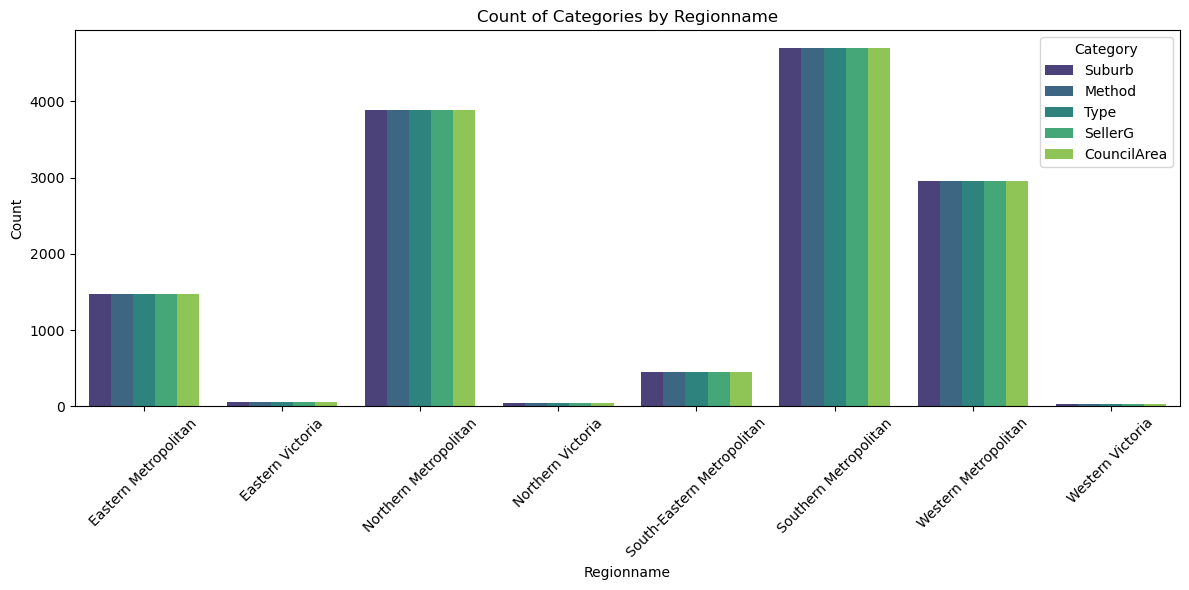

In [38]:
sns.set_palette("viridis")

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data.melt(id_vars='Regionname', var_name='Category', value_name='Count'),
            x='Regionname', y='Count', hue='Category', palette='viridis')

plt.title('Count of Categories by Regionname')
plt.xlabel('Regionname')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper right')

plt.tight_layout()

plt.show()

Obviously our `grouped_data` are tends to have the same counts for each of the `Category` in each `Region`. With that said, `Southern Metropolitan` are showing the most reside region of all other Melbourne. We will inspect this once we are performing EDA later on. 

## Frequency Counts by Top 5 Categories

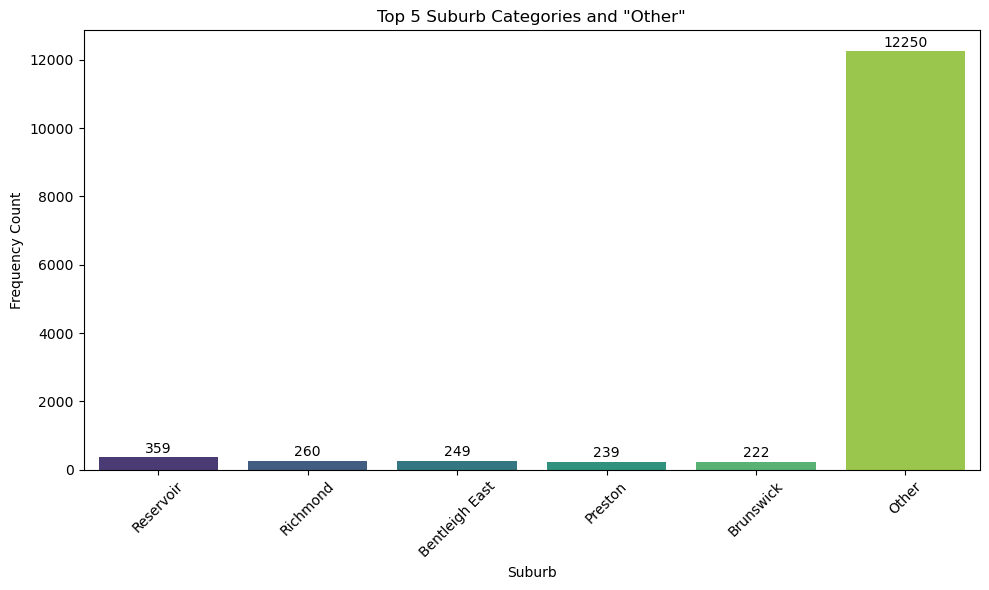

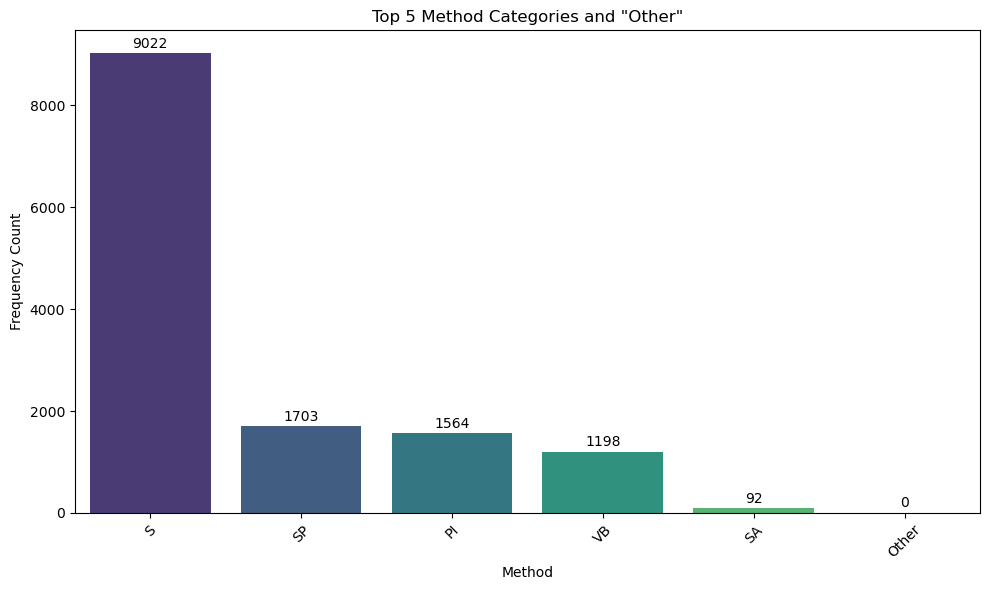

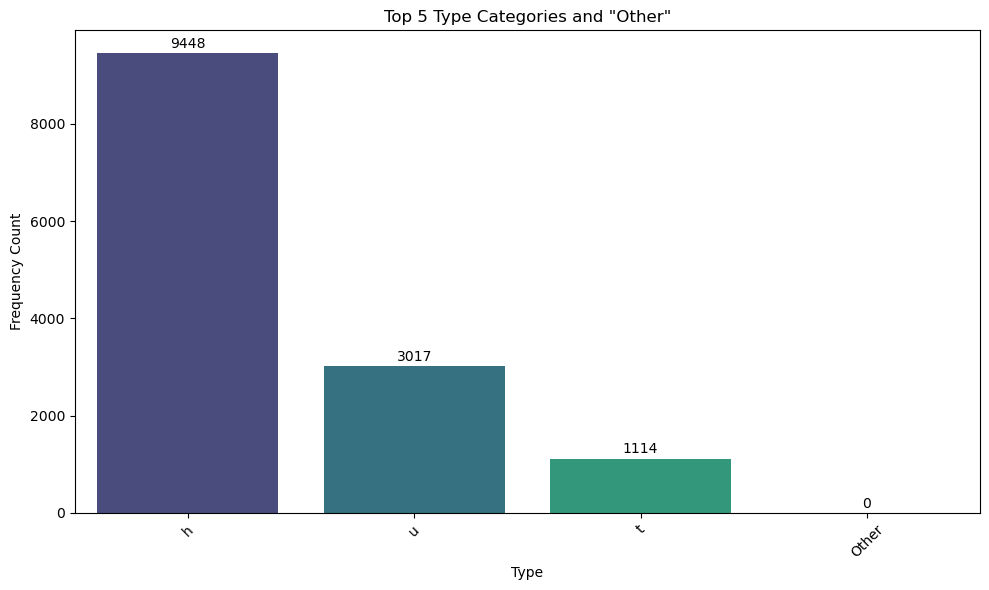

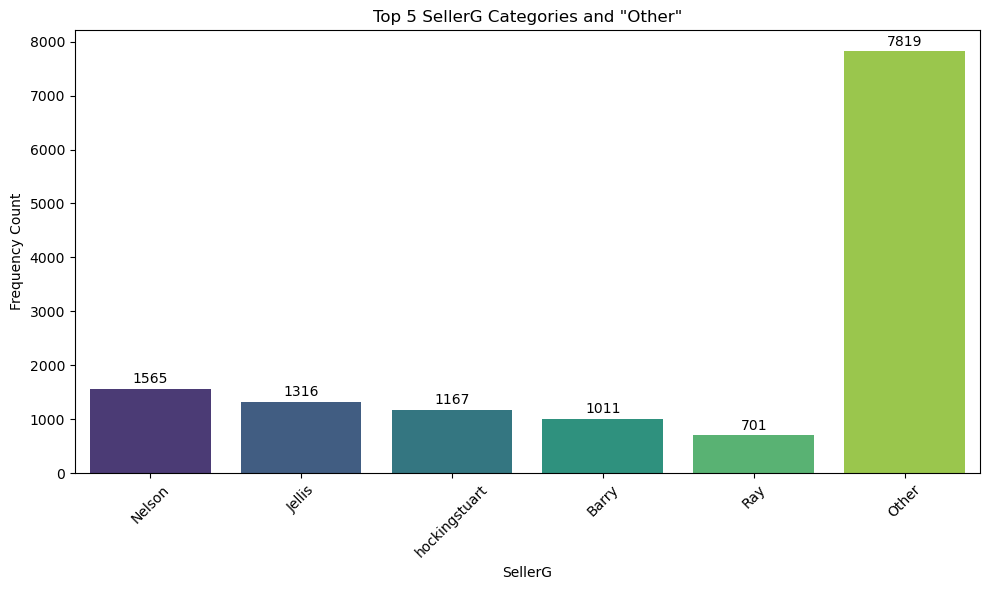

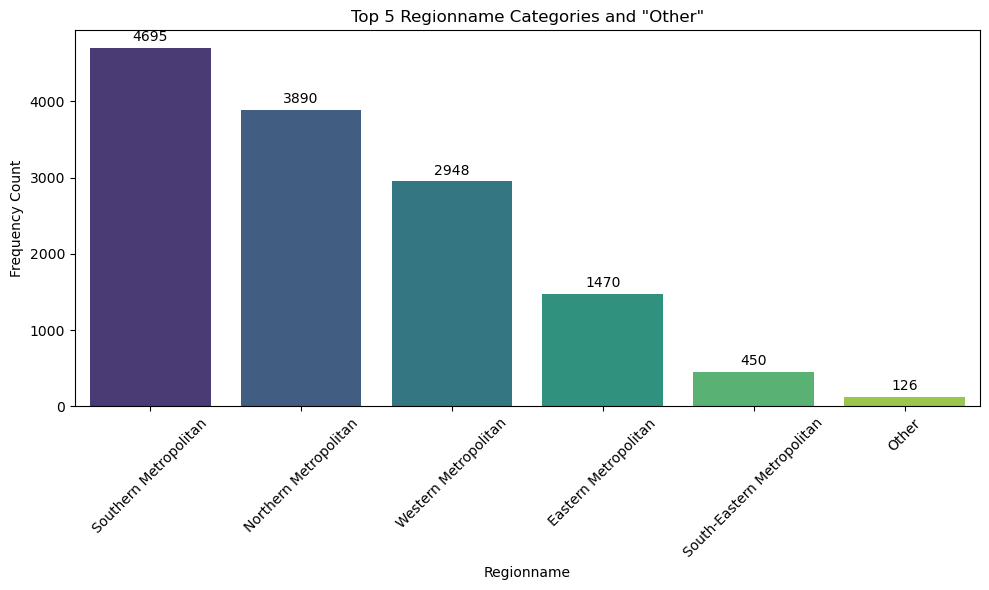

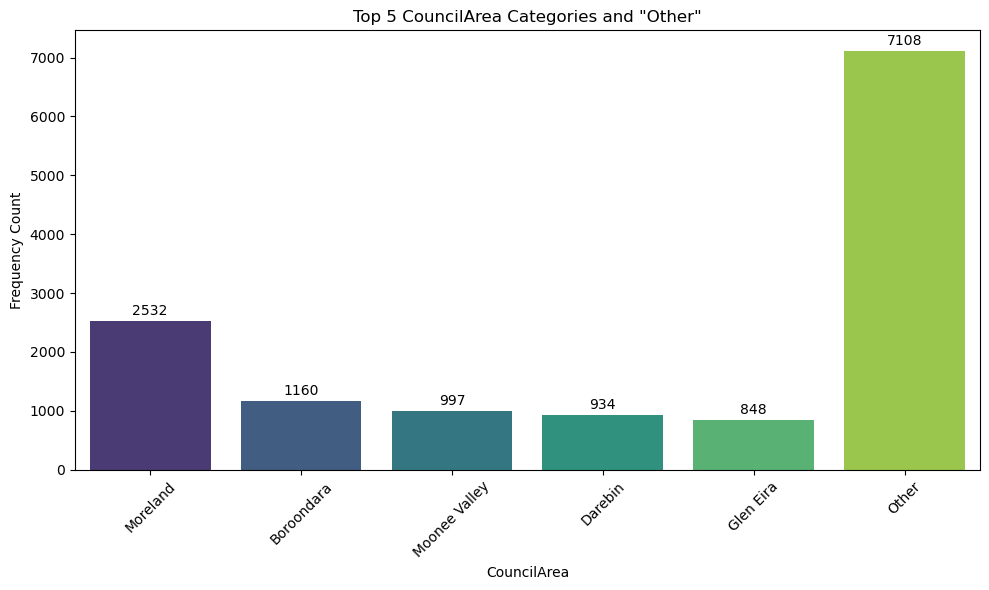

In [39]:
sns.set_palette("viridis")

top_n = 5

columns_to_analyze = ['Suburb', 'Method', 'Type', 'SellerG', 'Regionname', 'CouncilArea']

for column in columns_to_analyze:

    category_counts = housing[column].value_counts()

    top_categories = category_counts.head(top_n)
    other_count = category_counts.sum() - top_categories.sum()
    top_categories['Other'] = other_count
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    
    plt.title(f'Top {top_n} {column} Categories and "Other"')
    
    plt.xlabel(column)

    plt.ylabel('Frequency Count')
    
    plt.xticks(rotation=45)
    
    for i, count in enumerate(top_categories.values):
        ax.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

### Conclusion

- `Suburb Analysis:` `Reservoir` stands out as the most frequently occuring suburbs among other property listing. 
- `Property Type:` In Melbourne, the most common property type sold is `S`, indicating a specific type of property.
- `House Type:` When it comes to houses, `H` represents the most prevelant category among other property listings.
- `Top Real Estate Agents:` `Nelson` emerges as the leading real estate agent, that ultimatly sold over 1,565 properties in Melbourne.
- `Region Breakdown:` The `Southern Metropolitan` region dominates the property market, with the highest number of listing of 4,695 compared to the other regions.  
- `Council Area:` Among other areas, `Moreland` records the highest frequency of housing sales in Melbourne for over 2,532.  

## Data Visualization to Visuzalize the Distribution and Relationships Between Variables

In [40]:
housing['Price'] = housing['Price'].astype(int)

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13579 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13579 non-null  object        
 1   Address        13579 non-null  object        
 2   Rooms          13579 non-null  int64         
 3   Type           13579 non-null  object        
 4   Price          13579 non-null  int32         
 5   Method         13579 non-null  object        
 6   SellerG        13579 non-null  object        
 7   Date           13579 non-null  datetime64[ns]
 8   Distance       13579 non-null  float64       
 9   Postcode       13579 non-null  int64         
 10  Bathroom       13579 non-null  int64         
 11  Car            13579 non-null  float64       
 12  Landsize       13579 non-null  float64       
 13  BuildingArea   13579 non-null  float64       
 14  YearBuilt      13579 non-null  float64       
 15  CouncilArea    1357

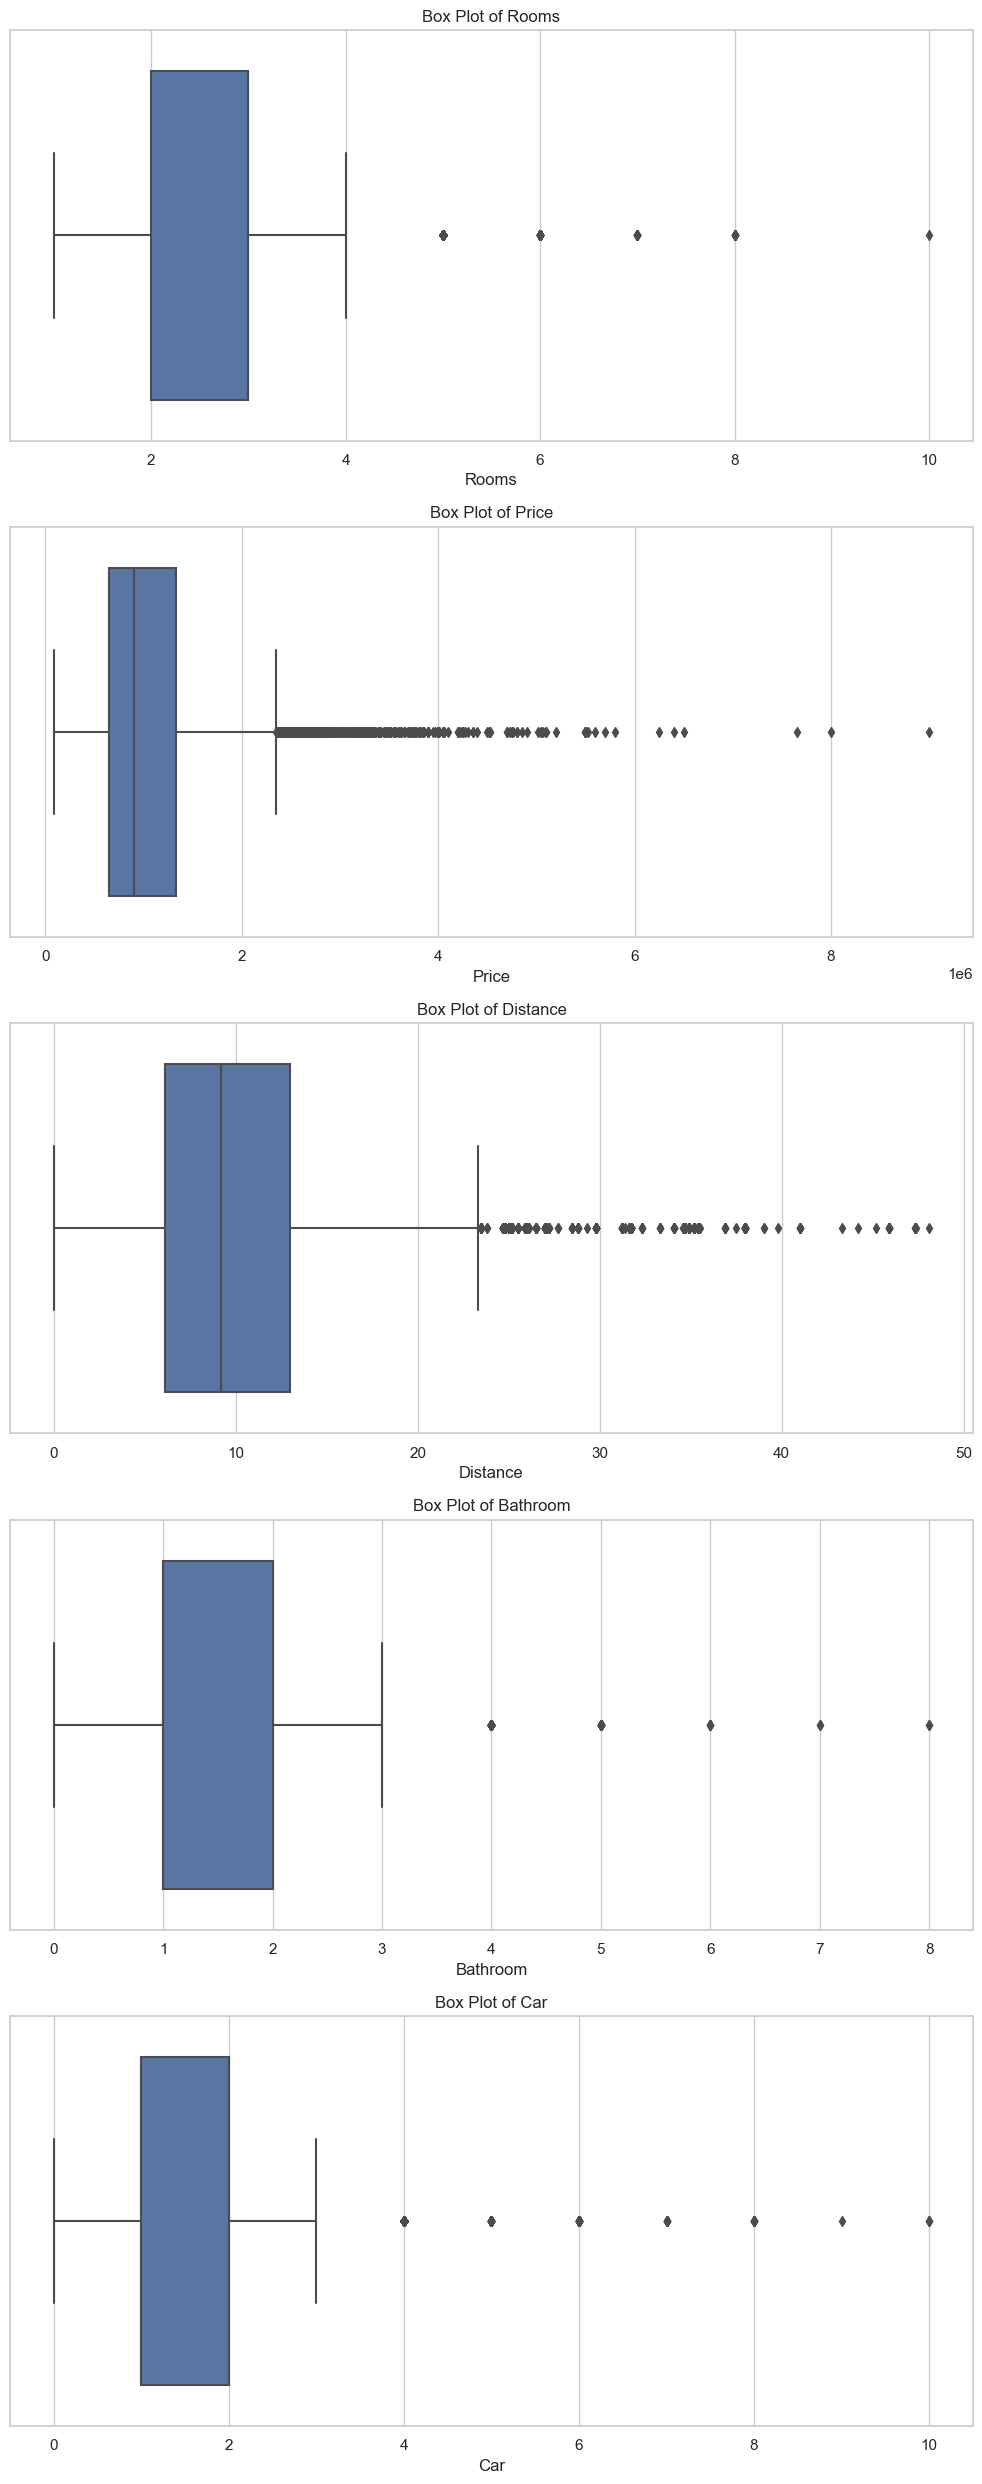

In [42]:
def plot_box_plots(data, numerical_columns):

    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create subplots
    fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5 * len(numerical_columns)))

    # Loop through numerical columns and create box plots
    for i, col in enumerate(numerical_columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel(col)

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage:
# Specify the numerical columns you want to plot
numerical_columns_to_plot = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car']

# Call the function with your housing dataset and the list of numerical columns
plot_box_plots(housing, numerical_columns_to_plot)

## Notes:

The `'Price'` column in this dataset denotes housing prices in Australian dollars (AUD). It's important to note that the values in this column are not divided by any factor, and they are presented in their original scale. The range of prices in the dataset varies from a minimum of 85,000 AUD to a maximum of 9,000,000 AUD. Please keep in mind that the prices are in dollars, and no additional scaling or transformation has been applied to this column.

## Explore the Relationships Between Variables

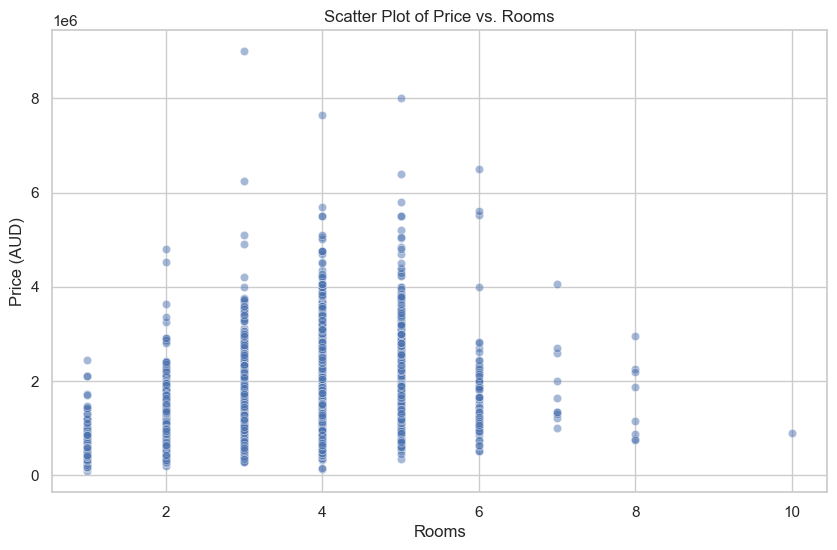

In [43]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Rooms', y='Price', data=housing, alpha=0.5)
plt.title('Scatter Plot of Price vs. Rooms')
plt.xlabel('Rooms')
plt.ylabel('Price (AUD)')
plt.show()

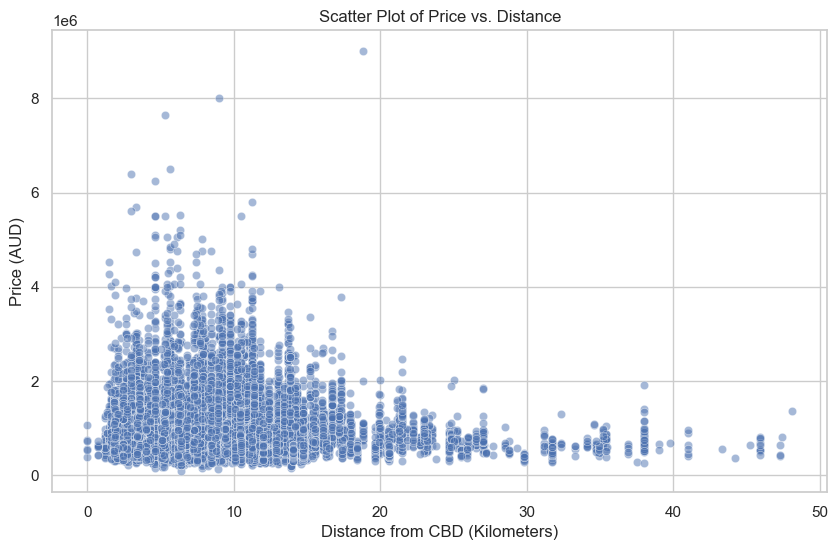

In [44]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Distance', y='Price', data=housing, alpha=0.5)
plt.title('Scatter Plot of Price vs. Distance')
plt.xlabel('Distance from CBD (Kilometers)')
plt.ylabel('Price (AUD)')
plt.show()

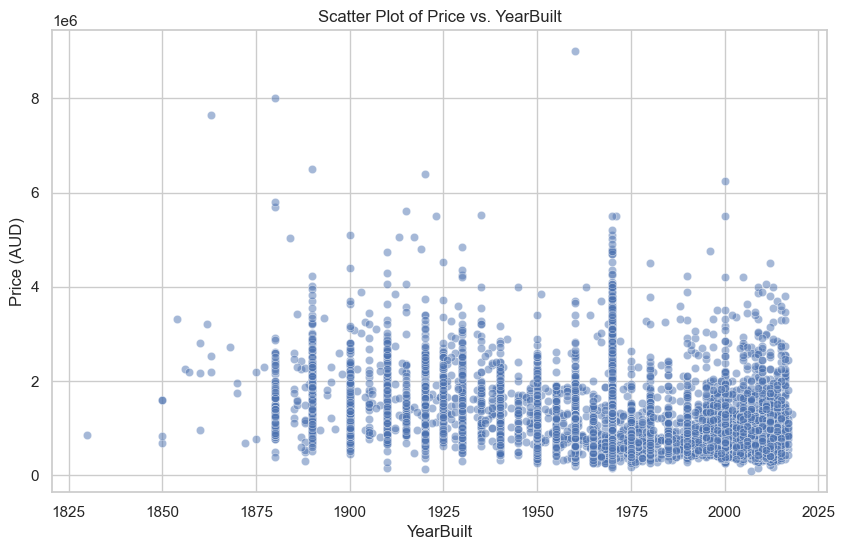

In [45]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='YearBuilt', y='Price', data=housing, alpha=0.5)
plt.title('Scatter Plot of Price vs. YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Price (AUD)')
plt.show()

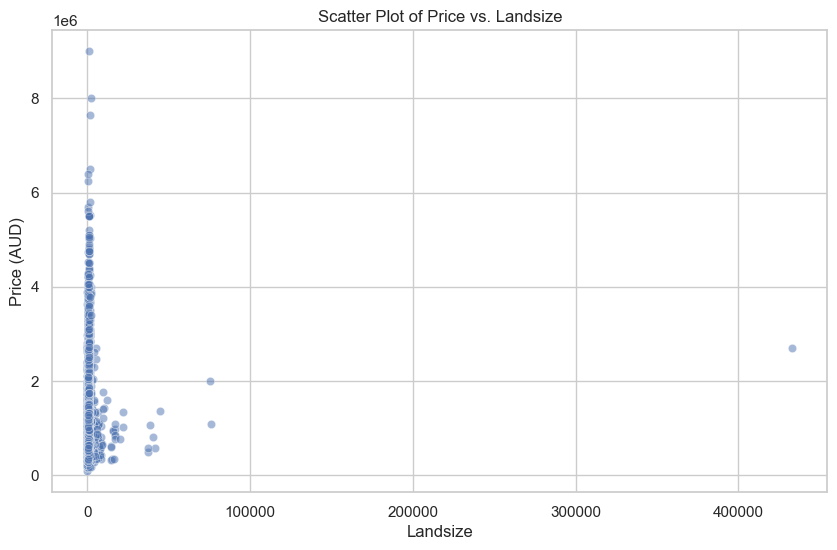

In [46]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Landsize', y='Price', data=housing, alpha=0.5)
plt.title('Scatter Plot of Price vs. Landsize')
plt.xlabel('Landsize')
plt.ylabel('Price (AUD)')
plt.show()

Our data seems to have more than 100,000 `Landsize` and i think it's too far from the average landsize and it would be consider as outliers also. So i will exlude this outlier and only include the landsize that is more "reasonable".

In [47]:
housing[(housing['Landsize'] >= 400000)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11020,Fitzroy,389 Gore St,3,h,2700000,VB,Kay,2017-12-08,2.1,3065,3,1.0,433014.0,126.0,1970.0,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0


In [48]:
index_to_drop = housing[housing['Landsize'] == 433014.0].index
housing = housing.drop(index_to_drop)

housing = housing.reset_index(drop=True)

In [49]:
housing.shape

(13578, 20)

Our data has set to it's orderly index, since we have dropping one of the row.  

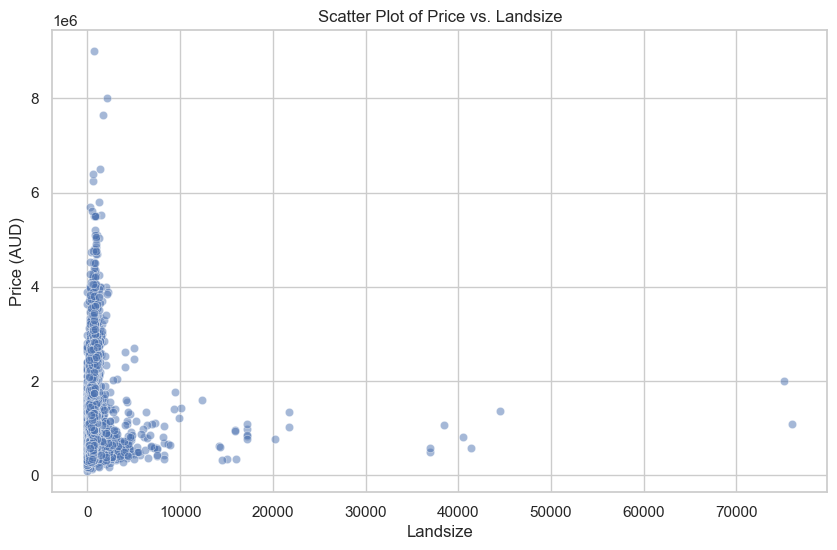

In [50]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Landsize', y='Price', data=housing, alpha=0.5)
plt.title('Scatter Plot of Price vs. Landsize')
plt.xlabel('Landsize')
plt.ylabel('Price (AUD)')
plt.show()

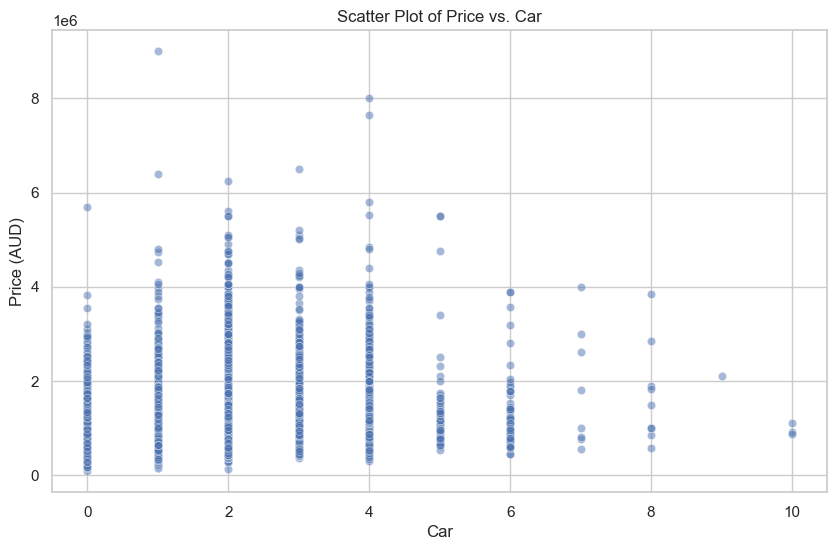

In [51]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Car', y='Price', data=housing, alpha=0.5)
plt.title('Scatter Plot of Price vs. Car')
plt.xlabel('Car')
plt.ylabel('Price (AUD)')
plt.show()

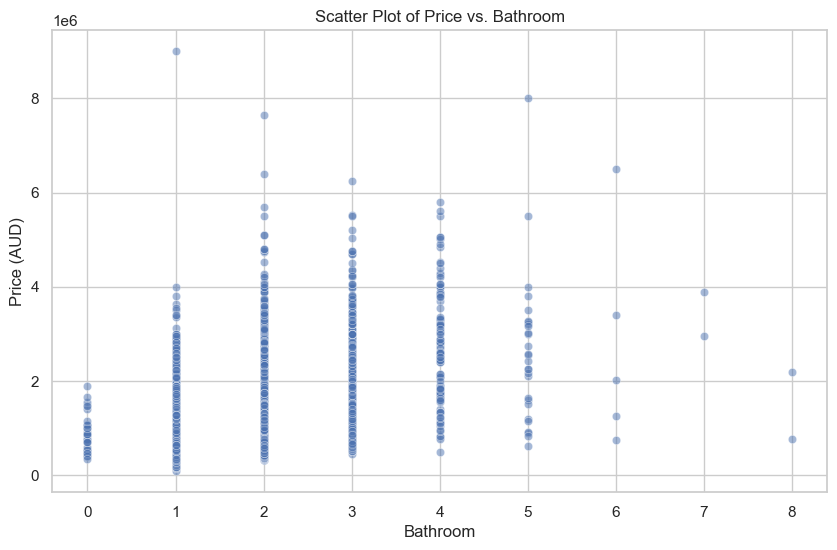

In [52]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Bathroom', y='Price', data=housing, alpha=0.5)
plt.title('Scatter Plot of Price vs. Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Price (AUD)')
plt.show()

## Conclusion for the Scatterplot: 

- In the scatterplot with the `number of rooms` (x-axis) and property `price` (y-axis), there is one outlier where the property has 10 rooms but a price below 2.
- In the scatterplot with `distance from the city center` (x-axis) and property `price` (y-axis), there is an outlier where the property price is above 8 and the distance is around 18 or 19 kilometers from the city center.
- In the scatterplot with the `year the property was built` (x-axis) and property `price` (y-axis), there is one outlier where the property price is above 8, and the properties were built between 1950 and 1975.
- In the scatterplot with `land size` (x-axis) and property `price` (y-axis), there are multiple outliers where the land size exceeds 30,000 square meters, and the prices are either 2 or below 2.
- In the scatterplot with the `number of car spots` (x-axis) and property `price` (y-axis), there is an outlier where the property has more than 8 car spots, but the price is in the range of 2 or below 2.
- In the scatterplot with the `number of bathrooms` (x-axis) and property `price` (y-axis), there is one outlier where the property has only one bathroom, but the price is above 8.

These observations highlight specific data points that deviate significantly from the general patterns observed in the scatterplots.

<br>

# Exploratory Data Analysis

## Exploring the `Southern Metropolitan` Region

In [53]:
southern_metro_data = housing[housing['Regionname'] == 'Southern Metropolitan'].reset_index(drop=True)

In [54]:
southern_metro_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,2016-03-09,3.3,3206,1,0.0,120.0,82.0,1900.0,Port Phillip,-37.84590,144.95550,Southern Metropolitan,3280.0
1,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,2016-03-09,3.3,3206,1,0.0,159.0,126.0,1970.0,Port Phillip,-37.84500,144.95380,Southern Metropolitan,3280.0
2,Albert Park,112 Beaconsfield Pde,3,h,2850000,PI,Buxton,2017-04-03,3.3,3206,2,0.0,211.0,198.0,1890.0,Port Phillip,-37.84810,144.94990,Southern Metropolitan,3280.0
3,Albert Park,94 Graham St,3,h,1850000,S,Greg,2017-04-03,3.3,3206,2,0.0,128.0,133.0,1890.0,Port Phillip,-37.84520,144.94880,Southern Metropolitan,3280.0
4,Albert Park,396 Montague St,2,h,1436000,S,RT,2017-04-03,3.3,3206,1,0.0,130.0,81.0,1900.0,Port Phillip,-37.84310,144.95650,Southern Metropolitan,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,Prahran,17 Packington Pl,2,h,1365000,S,Jellis,2017-08-26,4.6,3181,1,2.0,206.0,100.0,1900.0,Moreland,-37.85569,145.00522,Southern Metropolitan,7717.0
4691,Sandringham,221 Bluff Rd,4,h,1490000,S,Buxton,2017-08-26,15.2,3191,2,2.0,503.0,168.0,1930.0,Moreland,-37.95685,145.01977,Southern Metropolitan,4497.0
4692,Surrey Hills,20 Albert Cr,4,h,2720000,S,Kay,2017-08-26,10.2,3127,3,2.0,1005.0,126.0,1920.0,Moreland,-37.82421,145.10352,Southern Metropolitan,5457.0
4693,Surrey Hills,46 Durham Rd,3,h,1715000,S,Noel,2017-08-26,10.2,3127,1,2.0,438.0,151.0,1906.0,Moreland,-37.83015,145.09035,Southern Metropolitan,5457.0


In [55]:
southern_metro_data.describe()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,4695.000000,4.695000e+03,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000,4695.000000
mean,2.860916,1.372963e+06,8.756656,3156.714590,1.624068,1.578701,509.252183,140.204636,1964.142705,-37.866981,145.034312,7622.279233
std,1.044614,8.225292e+05,3.720828,35.228621,0.765060,0.884303,1457.210080,87.090821,29.502112,0.043080,0.043007,3263.435627
min,1.000000,1.310000e+05,0.700000,3006.000000,0.000000,0.000000,0.000000,0.000000,1850.000000,-37.990350,144.918300,394.000000
25%,2.000000,7.400000e+05,5.600000,3127.000000,1.000000,1.000000,108.000000,126.000000,1955.500000,-37.901200,145.001450,5051.000000
50%,3.000000,1.250000e+06,9.200000,3163.000000,1.000000,2.000000,361.000000,126.000000,1970.000000,-37.858800,145.037600,7717.000000
75%,4.000000,1.780000e+06,11.400000,3186.000000,2.000000,2.000000,664.000000,132.000000,1970.000000,-37.835670,145.067600,10412.000000
max,8.000000,8.000000e+06,17.900000,3207.000000,8.000000,9.000000,75100.000000,3112.000000,2018.000000,-37.781420,145.150420,14887.000000


In [56]:
southern_metro_data['Suburb'].value_counts().sum()

4695

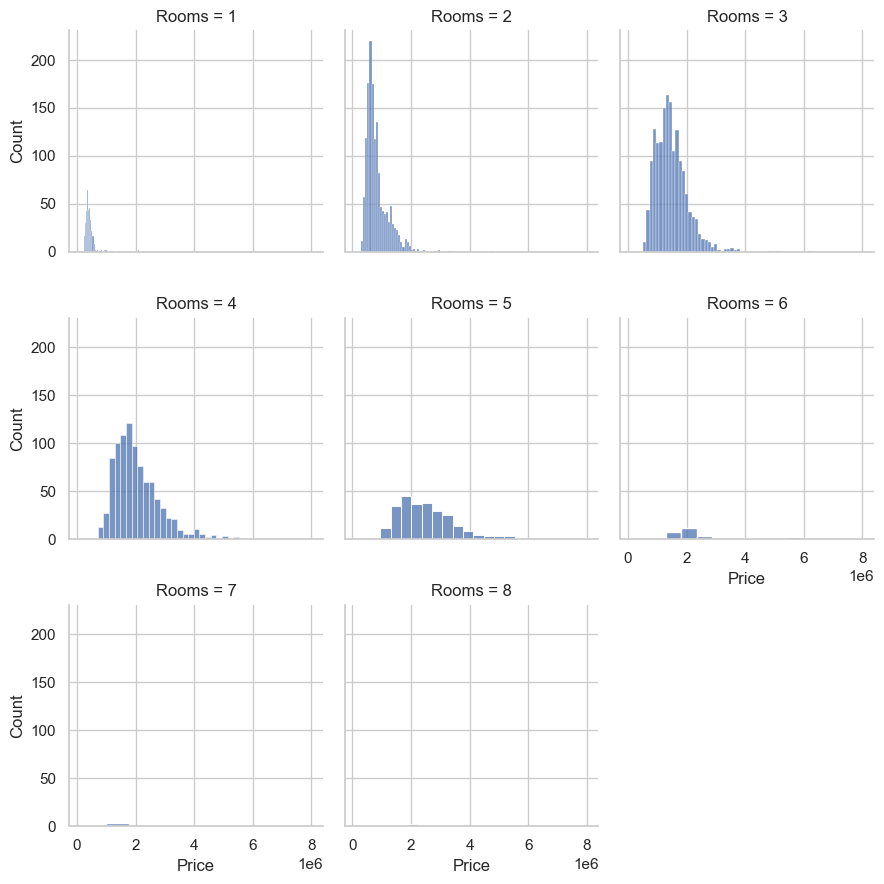

In [57]:
g = sns.FacetGrid(southern_metro_data, col='Rooms', col_wrap=3)

g.map_dataframe(sns.histplot, x='Price')

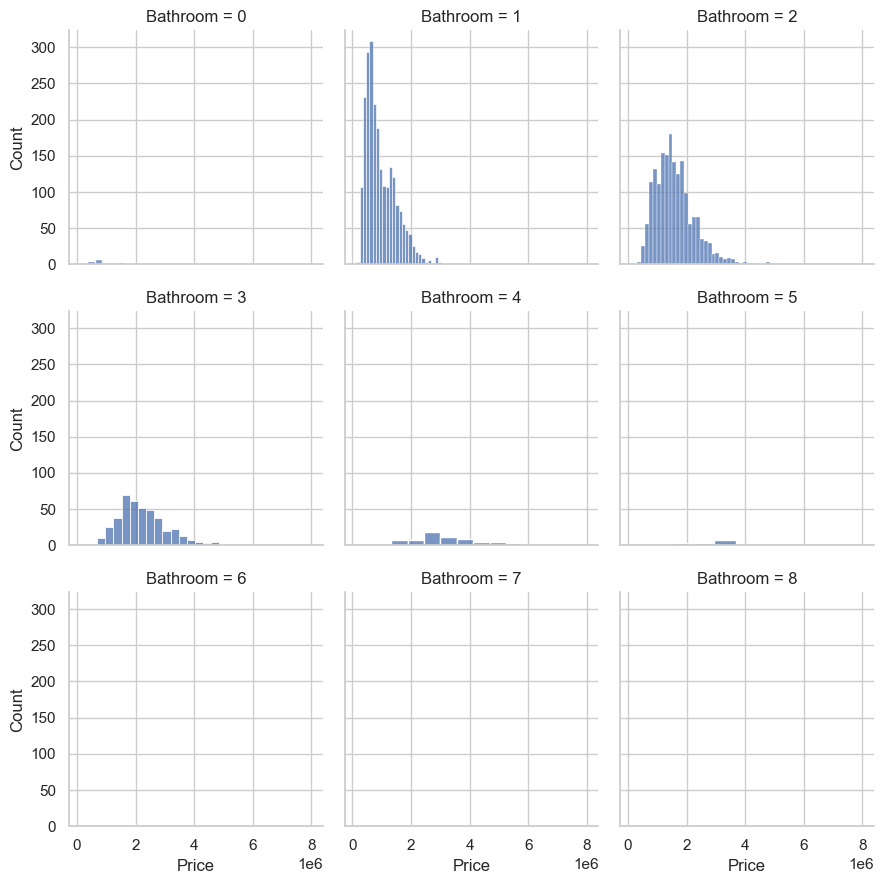

In [58]:
g = sns.FacetGrid(southern_metro_data, col='Bathroom', col_wrap=3)

g.map_dataframe(sns.histplot, x='Price')

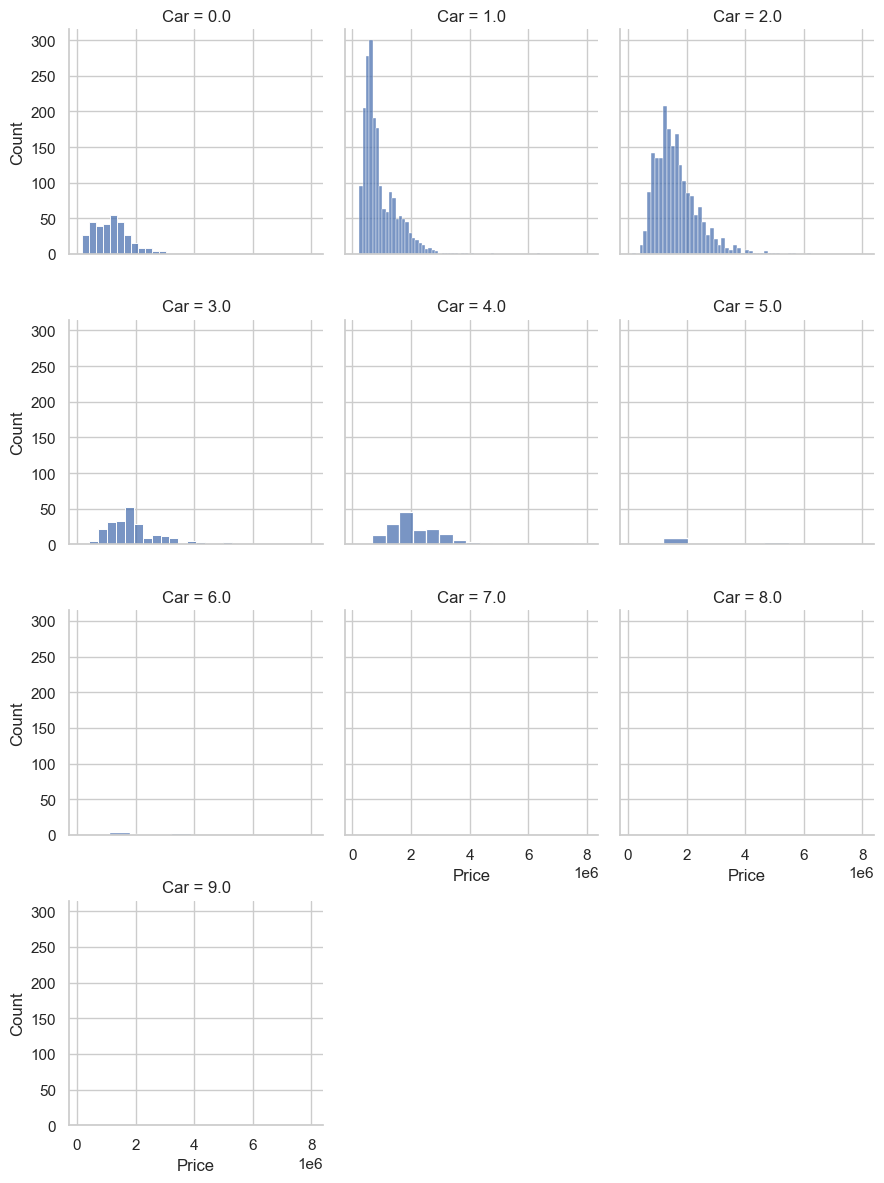

In [59]:
g = sns.FacetGrid(southern_metro_data, col='Car', col_wrap=3)

g.map_dataframe(sns.histplot, x='Price')

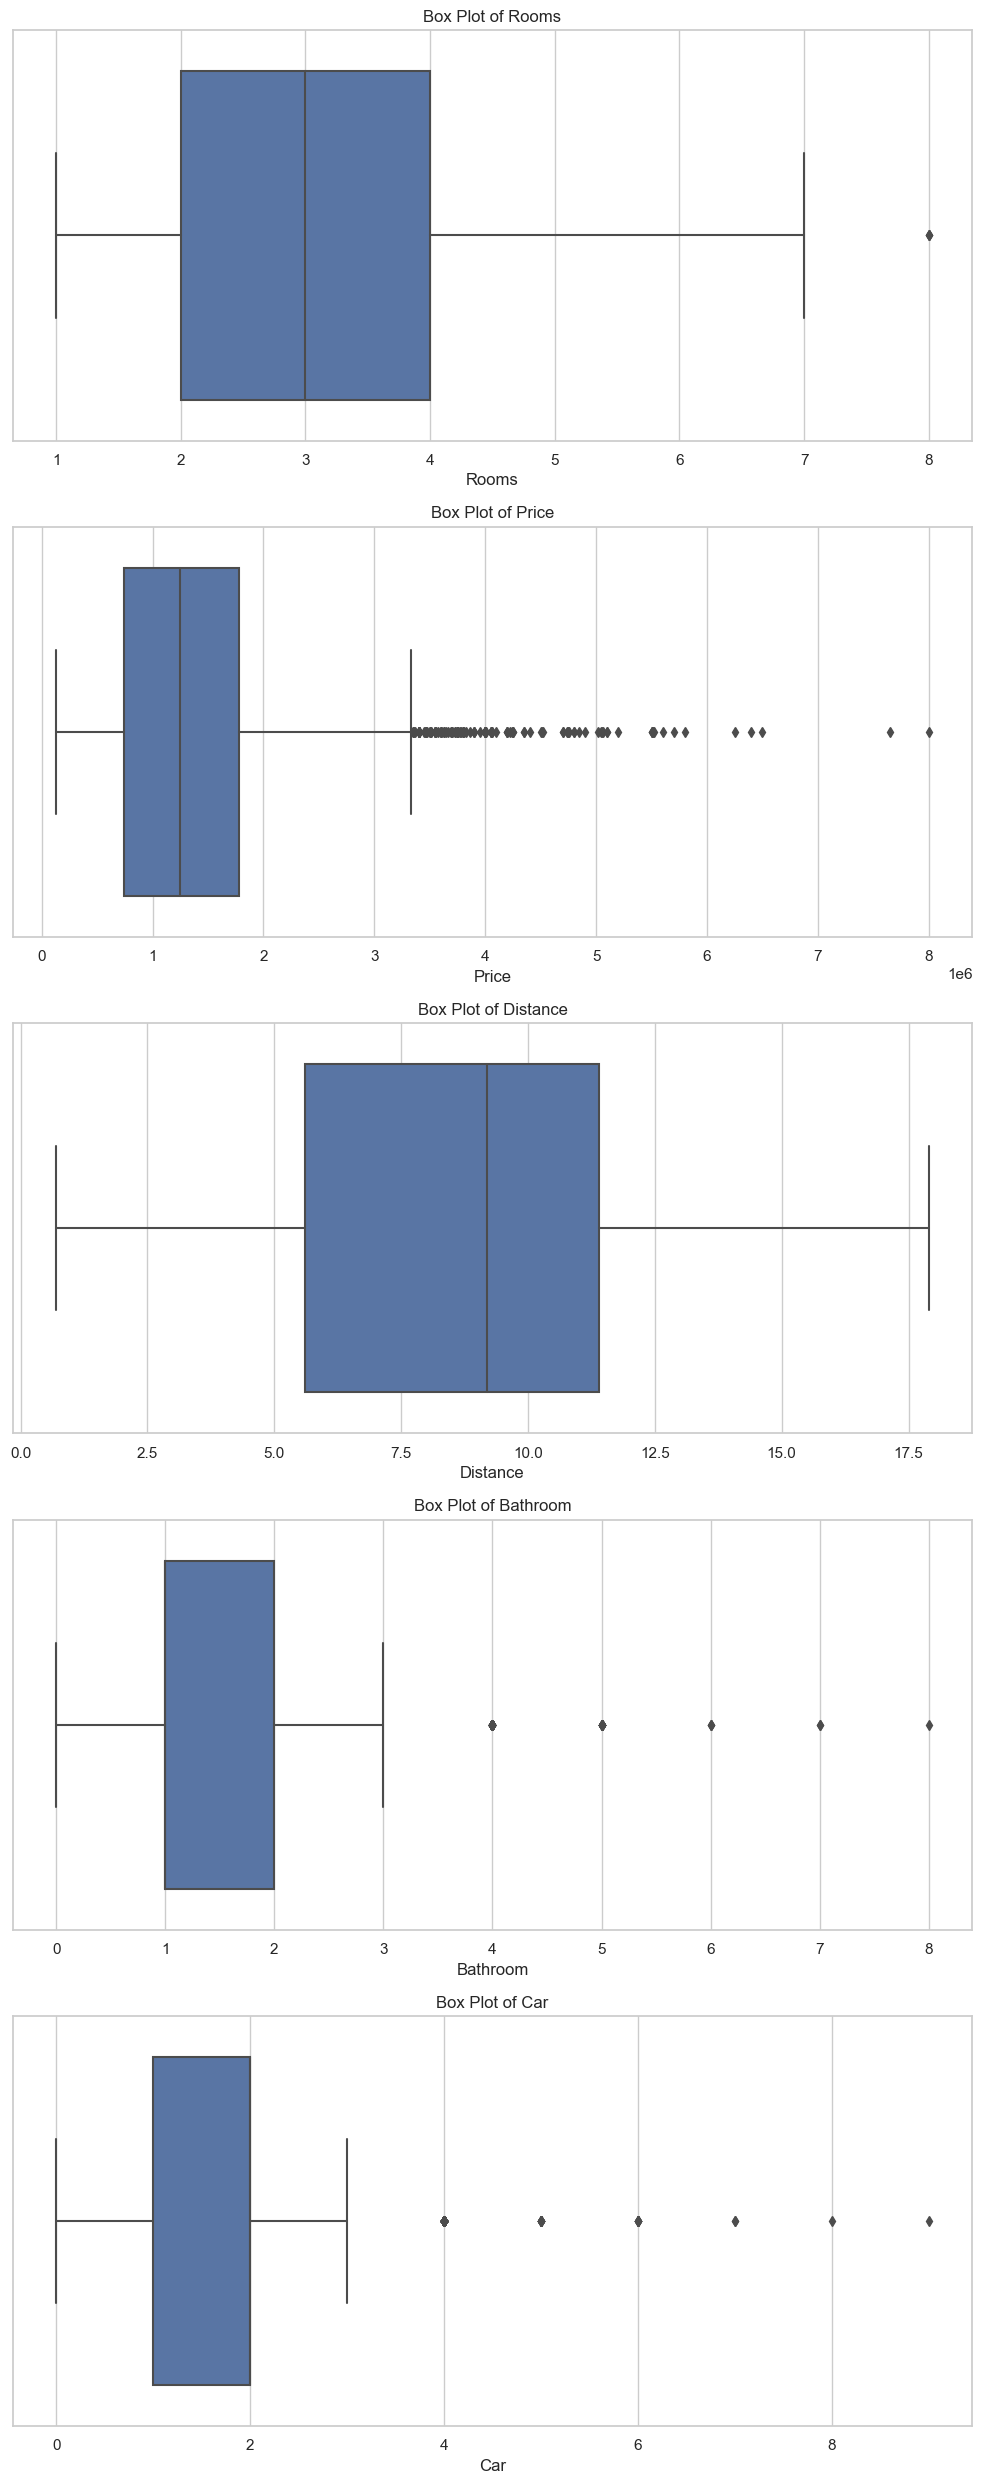

In [60]:
def plot_box_plots(data, numerical_columns):

    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create subplots
    fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5 * len(numerical_columns)))

    # Loop through numerical columns and create box plots
    for i, col in enumerate(numerical_columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel(col)

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage:
# Specify the numerical columns you want to plot
numerical_columns_to_plot = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car']

# Call the function with your housing dataset and the list of numerical columns
plot_box_plots(southern_metro_data, numerical_columns_to_plot)

### Exploring `Southern Metropolitan` Numerical Columns

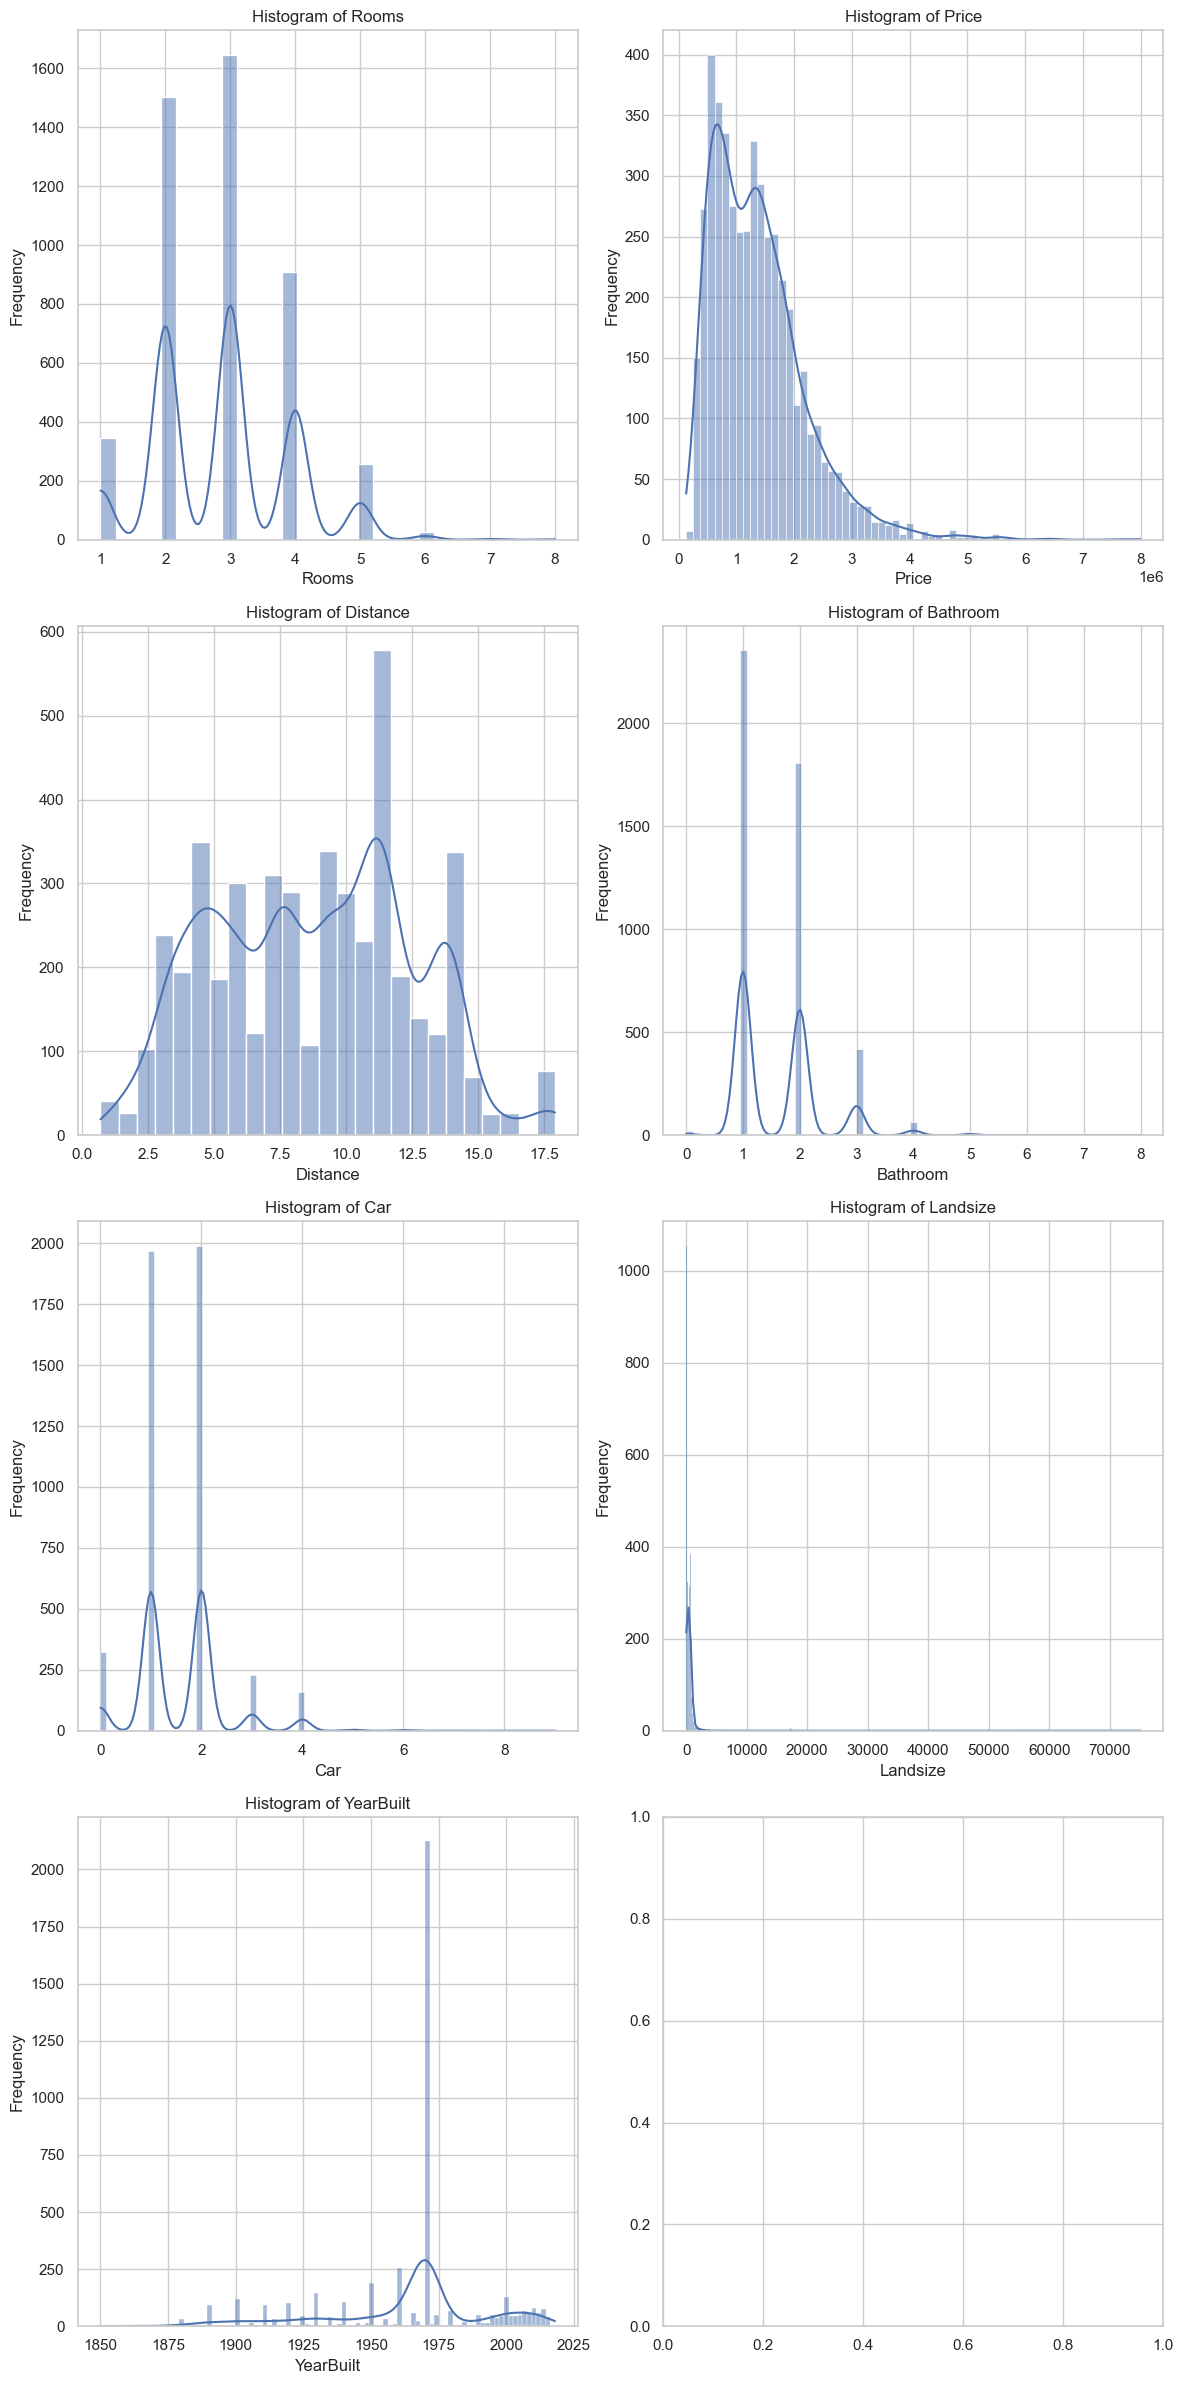

In [61]:
def plot_histograms(data, numerical_columns):

    sns.set(style="whitegrid")
    
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 1) // 2
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=data, x=col, ax=axes[i], kde=True)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()

    plt.show()

numerical_columns_to_plot = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'YearBuilt']

plot_histograms(southern_metro_data, numerical_columns_to_plot)

In [62]:
southern_metro_data['YearBuilt'].value_counts(ascending=False)

1970.0    2120
1960.0     255
1950.0     186
1930.0     144
2000.0     126
          ... 
1942.0       1
1889.0       1
1981.0       1
1978.0       1
1857.0       1
Name: YearBuilt, Length: 131, dtype: int64

In [63]:
southern_metro_data['Rooms'].value_counts(ascending=False)

3    1646
2    1502
4     910
1     345
5     258
6      26
7       5
8       3
Name: Rooms, dtype: int64

In [64]:
southern_metro_data['Distance'].value_counts(ascending=False).iloc[:20]

11.2    335
4.6     263
9.2     256
3.3     214
13.9    204
11.4    171
13.0    140
6.1     137
9.7     136
7.7     129
7.5     126
5.6     124
3.8     118
10.7    108
7.8     107
13.7     97
6.3      95
13.8     87
4.5      86
7.3      77
Name: Distance, dtype: int64

## `Southern Metropolitan` Numerical Histogram Summary

- `Rooms:` The distribution of the number of rroms in houses shows a right-skewed pattern. Most houses have 1 to 4 rooms, but there are outliers with 6 to 8 rooms, although they are relatively rare, with fewer than 30 houses falling into this range. 
- `Price:` In terms of price the housing price predominantly fall in the range of 1 to 3, with a noticeable decline after 4. Some outliers have significantly higher prices, but the majority of listings are within this affordable range. 
- `Distance:` The majority of houses in the `Southern Metropolitan` region have a relatively short commute to the `Central Business District (CBD)`, with a high volume of listings within a walking distance of around `11.2 minutes`. Combining the range of `11.0` to `11.9` minutes, we find nearly 500 to 600 listings, making it a popular choice for proximity to the CBD. 
- `Bathroom:` The number of bathrooms in houses predominantly falls into the category of `1` and `2` bathroom, with over `1,500` houses falling into this category. 
- `Car:` Similarly, the car space avaiable for the parking is primarily in the range of `1` to `2` parking spots. Close to `2,000` houses falling into this category. 
- `BuildingArea:` The histogram and kernel density estimate (kde) for the building area do not provide significant insights. However, there are some outliers with the building areas less than 500 meters. 
- `Landsize:` Landsize shows a right-skewed distribution. Most houses have smaller land sizes (less than 5000 meters), with a few outliers having much larger land sizes. There larger plots tend to be less frequent due to their higher prices. 
- `YearBuilt:` The most commonly found houses were constructed around 1970 with over 2,120 houses built in that year. 

### Exploring `Southern Metropolitan` Categorical Columns

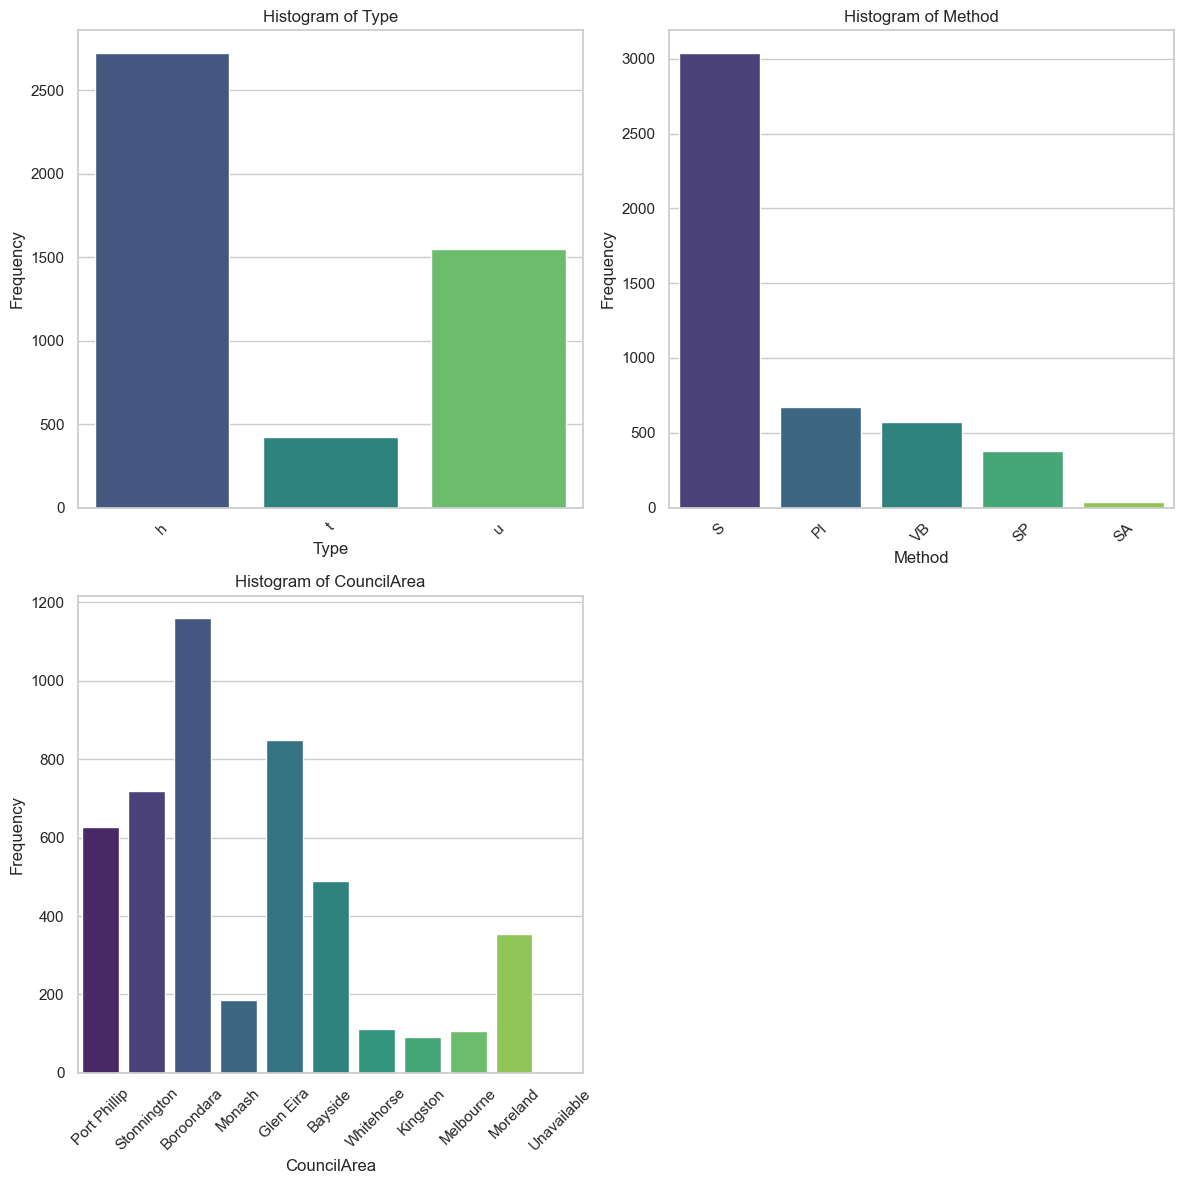

In [65]:
def plot_categorical_histograms(data, categorical_columns):

    sns.set(style="whitegrid")
    
    num_plots = len(categorical_columns)
    num_rows = (num_plots + 1) // 2
    num_cols = 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_columns):
        sns.countplot(data=data, x=col, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Remove any extra empty subplots
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()

    plt.show()

categorical_columns_to_plot = ['Type', 'Method', 'CouncilArea']

plot_categorical_histograms(southern_metro_data, categorical_columns_to_plot)

In [66]:
southern_metro_data['Type'].value_counts(ascending=False)

h    2721
u    1549
t     425
Name: Type, dtype: int64

In [67]:
southern_metro_data['Method'].value_counts(ascending=False)

S     3038
PI     671
VB     572
SP     376
SA      38
Name: Method, dtype: int64

In [68]:
southern_metro_data['CouncilArea'].value_counts(ascending=False)

Boroondara      1159
Glen Eira        848
Stonnington      719
Port Phillip     628
Bayside          489
Moreland         355
Monash           187
Whitehorse       111
Melbourne        106
Kingston          92
Unavailable        1
Name: CouncilArea, dtype: int64

## `Southern Metropolitan` Categorical Histogram Summary

- `Type:` The most common property type in the `Southern Metropolitan` region is `House` (Type 'H'), with over 2,721 properties falling into this cattegory. This suggest that houses are the dominant property type in this region. 
- `Method:` The most common frequently used selling method for properties in this region is `Property Sold` (Method 'S'), with over `3,038` properties sold using this method. This indicates that private sales (S) are pravelent in this area compared to other methods. 
- `CouncilArea:` The Council Area that appears most frequently in the `Southern Metropolitan` region is `Boroondara`, with over `1,159` properties falling within it's jurisdiction. This implies that `Boroondara` is a popular choice among other property buyers in this region. Possibly due to it's amenities or other factors. 

### Summary: 
In summary, the patterns observed in the categorical data for the `Southern Metropolitan` region indicate a preference for houses, a prevelent use of private sales methods, and the popularity of the `Boroondara` Council Area.

### Finding the common patterns within our Numerical Histogram Insight

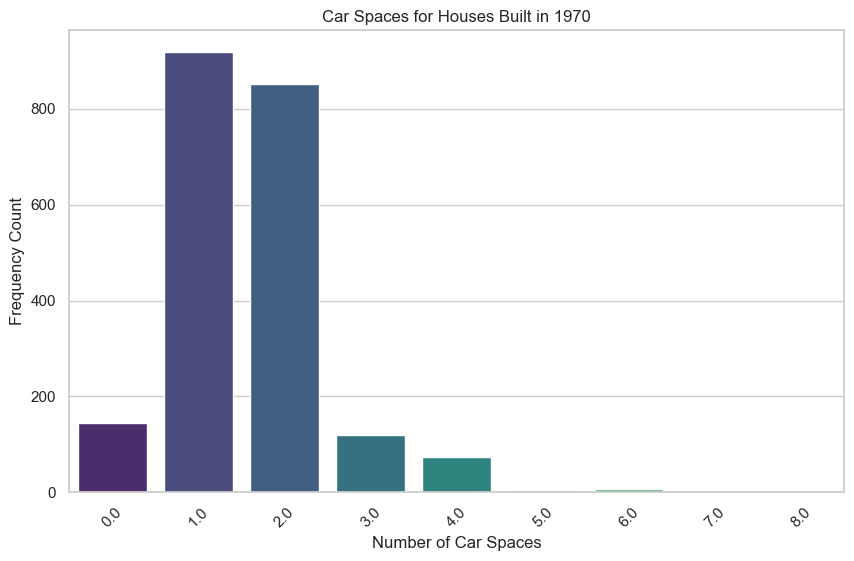

In [69]:
houses_1970 = southern_metro_data[southern_metro_data['YearBuilt'] == 1970]

car_counts = houses_1970['Car'].value_counts().reset_index()
car_counts.columns = ['Car Spaces', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=car_counts, x='Car Spaces', y='Count', palette='viridis')
plt.title('Car Spaces for Houses Built in 1970')
plt.xlabel('Number of Car Spaces')
plt.ylabel('Frequency Count')
plt.xticks(rotation=45)
plt.show()

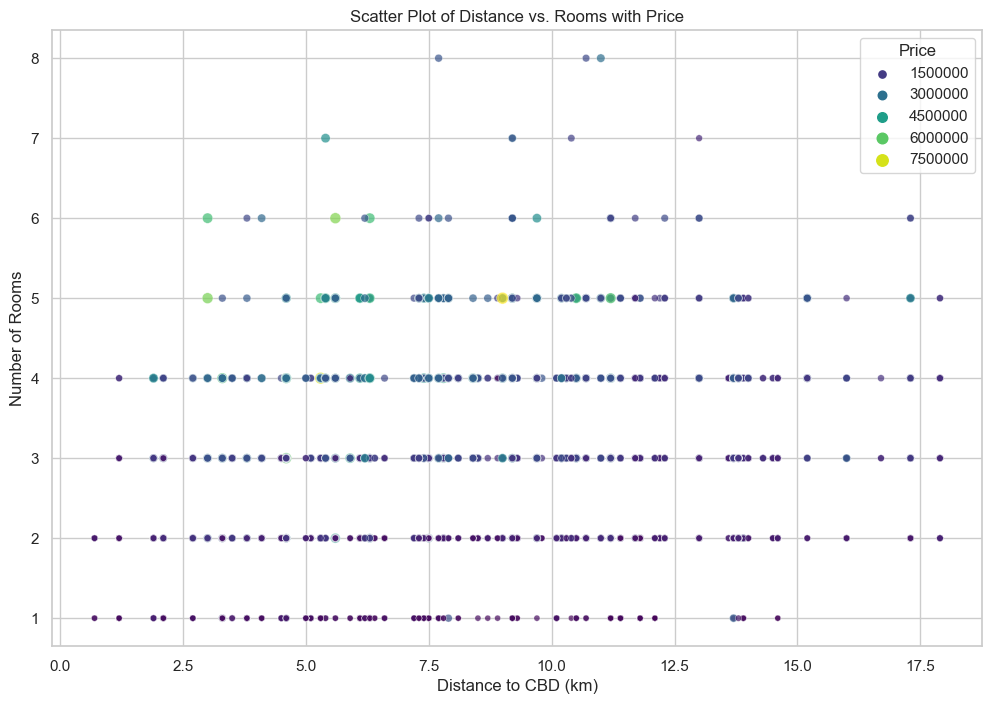

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Distance', y='Rooms', hue='Price', data=southern_metro_data, palette='viridis', alpha=0.7, size='Price')
plt.title('Scatter Plot of Distance vs. Rooms with Price')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Number of Rooms')
plt.legend(title='Price', loc='upper right')
plt.show()

In [71]:
test = (southern_metro_data[
    (southern_metro_data['Distance'] < 2.5) & 
    (southern_metro_data['Rooms'] <= 2) & 
    (southern_metro_data['Price'] <= 1500000)]
    .reset_index(drop=True))

test

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,South Melbourne,806/50 Albert Rd,2,u,593000,S,Dingle,2016-03-09,2.1,3205,2,1.0,0.0,83.0,2012.0,Port Phillip,-37.83410,144.97130,Southern Metropolitan,5943.0
1,South Melbourne,18 Cobden St,2,h,920500,S,Greg,2016-03-12,2.1,3205,1,0.0,114.0,126.0,1970.0,Port Phillip,-37.83440,144.96860,Southern Metropolitan,5943.0
2,South Melbourne,218 Ferrars St,1,h,1002000,S,Marshall,2016-03-12,2.1,3205,1,0.0,84.0,126.0,1912.0,Port Phillip,-37.83320,144.95480,Southern Metropolitan,5943.0
3,South Melbourne,294 Moray St,2,h,1355000,S,Marshall,2016-03-12,2.1,3205,1,0.0,101.0,126.0,1970.0,Port Phillip,-37.83590,144.96440,Southern Metropolitan,5943.0
4,South Melbourne,16/63 Dorcas St,2,u,575000,SP,Greg,2016-04-06,2.1,3205,2,1.0,0.0,126.0,2001.0,Port Phillip,-37.83110,144.96790,Southern Metropolitan,5943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,South Melbourne,349 Park St,2,h,1180000,S,Greg,2017-09-09,1.9,3205,1,2.0,140.0,126.0,1970.0,Moreland,-37.83745,144.95459,Southern Metropolitan,5943.0
71,South Melbourne,40 Smith St,2,h,970000,VB,Marshall,2017-09-09,1.9,3205,1,2.0,82.0,126.0,1900.0,Moreland,-37.83606,144.95164,Southern Metropolitan,5943.0
72,South Melbourne,250 Ferrars St,1,h,855000,S,Greg,2017-09-16,1.9,3205,1,0.0,67.0,72.0,1900.0,Moreland,-37.83430,144.95529,Southern Metropolitan,5943.0
73,South Melbourne,95 Bank St,2,h,1151000,S,Marshall,2017-09-23,1.9,3205,1,2.0,128.0,95.0,1890.0,Moreland,-37.83281,144.96633,Southern Metropolitan,5943.0


In [72]:
test2 = (southern_metro_data[
    (southern_metro_data['Rooms'] == 8) & 
    (southern_metro_data['Distance'] > 7.5) & 
    (southern_metro_data['Distance'] < 12.5)]
    .reset_index(drop=True))

test2


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ashburton,115 Ashburn Gr,8,h,2950000,S,hockingstuart,2016-10-09,11.0,3147,7,4.0,1472.0,618.0,2009.0,Boroondara,-37.87290,145.07880,Southern Metropolitan,3052.0
1,Brighton East,22 Milliara Gr,8,h,1880000,VB,Buxton,2017-05-13,10.7,3187,3,3.0,614.0,126.0,1970.0,Bayside,-37.90970,145.01610,Southern Metropolitan,6938.0
2,Camberwell,1088 Toorak Rd,8,h,2200000,PI,Ross,2017-08-07,7.7,3124,8,4.0,650.0,126.0,1970.0,Boroondara,-37.84812,145.07414,Southern Metropolitan,8920.0


In [73]:
test3 = (southern_metro_data[
    (southern_metro_data['Rooms'] == 7) & 
    (southern_metro_data['Distance'] > 5.0) & 
    (southern_metro_data['Distance'] < 15.0)]
    .reset_index(drop=True))

test3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Balwyn North,30 Abbott St,7,h,1350000,PI,Barry,2016-03-12,9.2,3104,2,0.0,942.0,126.0,1970.0,Boroondara,-37.79230,145.10290,Southern Metropolitan,7809.0
1,Balwyn North,2 Tudor Ct,7,h,2600000,PI,Barry,2016-05-14,9.2,3104,3,3.0,637.0,529.0,2008.0,Boroondara,-37.78980,145.09670,Southern Metropolitan,7809.0
2,Bentleigh,143 Patterson Rd,7,h,1005000,S,Ray,2016-04-06,13.0,3204,3,4.0,607.0,126.0,1950.0,Glen Eira,-37.92690,145.04700,Southern Metropolitan,6795.0
3,Burwood,11 McComas Gr,7,h,1642000,S,Buxton,2017-05-27,10.4,3125,4,2.0,765.0,146.0,1950.0,Whitehorse,-37.85103,145.11232,Southern Metropolitan,5678.0
4,Kew,43 Rowland St,7,h,4050000,S,Marshall,2017-12-08,5.4,3101,4,2.0,725.0,126.0,1970.0,Boroondara,-37.81185,145.05387,Southern Metropolitan,10331.0


### From these patterns, we can observe several correlations: 

- Houses built in 1970 are more common, and they tend to have 1 to 2 car spaces. 
- Houses colser to CBD (lower distance) appear to have fewer rooms but are more affordable (lower price).
- Most houses have 1 bathroom and 1 to 2 car spaces, indicating common features in this region. 

### Conclusion:
The observed patterns suggesst that there is a strong preference for houses built in 1970, which may indicate their popularity among buyers. Additionally, houses closer to ther CBD tend to have fewer rooms but are more affordable. These insights can guide further analysis, such as exploring relationship between the `YearBuilt` and other features, or understanding the factors in influencing housing prices in the `Southern Metropolitan` region. 

<br>

# Overall Summary for Exploratory Data Analysis

## Numerical Histogram Summary

**`Rooms:`**
- The distribution of the number of rooms in houses shows a `right-skewed pattern`.
- Most houses have `1 to 4 rooms`, with a few outliers of `6 to 8 rooms`.
- Outliers with 6 to 8 rooms are `relatively rare`, with `fewer than 30 houses` falling into this range.

**`Price:`**
- Housing prices predominantly fall in the range of `1 to 3`.
- A noticeable decline in the number of listings occurs `after 4`.
- Some outliers have `significantly higher prices`, but the majority of listings are within this `affordable range`.

**`Distance:`**
- `The majority of houses in the "Southern Metropolitan" region` have a relatively `short commute` to the Central Business District (CBD).
- A high volume of listings falls within a walking distance of around `11.2 minutes`.
- Combining the range of `11.0 to 11.9 minutes`, nearly `500 to 600 listings are present`, making it a popular choice for proximity to the CBD.

**`Bathroom:`**
- The number of bathrooms in houses predominantly falls into the category of `1 and 2 bathrooms`.
- `Over 1,500 houses` fall into this category.

**`Car:`**
- Car space availability for parking is primarily in the range of `1 to 2 parking spots`.
- `Close to 2,000 houses` fall into this category.

**`BuildingArea:`**
- The histogram and kernel density estimate (kde) for the building area do not provide significant insights.
- However, there are some `outliers with building areas less than 500 square meters`.

**`Landsize:`**
- Landsize shows a `right-skewed distribution`.
- Most houses have smaller land sizes `(less than 5,000 square meters)`, with a few outliers having much larger land sizes.
- Larger plots tend to be less frequent due to their `higher prices`.

**`YearBuilt:`**
- The most commonly found houses were `constructed around 1970`, with over `2,120 houses built in that year`.

#### Correlations Observed:
- `Houses built in 1970` are more `common`, and they tend to have `1 to 2 car spaces`.
- Houses closer to the CBD (lower distance) appear to have `fewer rooms but are more affordable (lower price)`.
- Most houses have `1 bathroom and 1 to 2 car spaces`, indicating common features in this region.

## Categorical Histogram Summary

**`Type:`**
- The most common property type in the "Southern Metropolitan" region is `'House' (Type 'h')`, with over `2,721 properties` falling into this category.
- This suggests that houses are the `dominant property type` in this region.

**`Method:`**
- The most frequently used selling method for properties in this region is `'S' (Method 'S')`, with over `3,038 properties sold` using this method.
- This indicates that `private sales (S)` are `prevalent in this area` compared to other methods.

**`CouncilArea:`**
- The Council Area that appears most frequently in the "Southern Metropolitan" region is `'Boroondara'`, with over `1,159 properties` falling within its jurisdiction.
- This implies that 'Boroondara' is a `popular choice among property` buyers in this region, `possibly due to its amenities or other factors`.

<br>

# Simple Linear Regression

In [74]:
regression_columns = ['Regionname', 
                      'Rooms', 
                      'Type', 
                      'Method',
                      'Price', 
                      'Distance', 
                      'Bathroom', 
                      'Car', 
                      'Landsize', 
                      'BuildingArea', 
                      'YearBuilt', 
                      'CouncilArea']

housing_model = housing[regression_columns].copy()

housing_model.head()

,Regionname,Rooms,Type,Method,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Northern Metropolitan,2,h,S,1480000,2.5,1,1.0,202.0,126.0,1970.0,Yarra
1,Northern Metropolitan,2,h,S,1035000,2.5,1,0.0,156.0,79.0,1900.0,Yarra
2,Northern Metropolitan,3,h,SP,1465000,2.5,2,0.0,134.0,150.0,1900.0,Yarra
3,Northern Metropolitan,3,h,PI,850000,2.5,2,1.0,94.0,126.0,1970.0,Yarra
4,Northern Metropolitan,4,h,VB,1600000,2.5,1,2.0,120.0,142.0,2014.0,Yarra


In [75]:
housing_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13578 entries, 0 to 13577
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Regionname    13578 non-null  object 
 1   Rooms         13578 non-null  int64  
 2   Type          13578 non-null  object 
 3   Method        13578 non-null  object 
 4   Price         13578 non-null  int32  
 5   Distance      13578 non-null  float64
 6   Bathroom      13578 non-null  int64  
 7   Car           13578 non-null  float64
 8   Landsize      13578 non-null  float64
 9   BuildingArea  13578 non-null  float64
 10  YearBuilt     13578 non-null  float64
 11  CouncilArea   13578 non-null  object 
dtypes: float64(5), int32(1), int64(2), object(4)
memory usage: 1.2+ MB


In [76]:
housing_model.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,13578.000000,1.357800e+04,13578.000000,13578.000000,13578.000000,13578.000000,13578.000000,13578.000000
mean,2.937988,1.075555e+06,10.138069,1.534173,1.611725,526.548093,139.636643,1966.844749
std,0.955818,6.392049e+05,5.868648,0.691633,0.960631,1467.024291,392.246225,28.328624
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000
25%,2.000000,6.500000e+05,6.100000,1.000000,1.000000,177.000000,122.000000,1960.000000
50%,3.000000,9.030000e+05,9.200000,1.000000,2.000000,440.000000,126.000000,1970.000000
75%,3.000000,1.330000e+06,13.000000,2.000000,2.000000,651.000000,129.980000,1975.000000
max,10.000000,9.000000e+06,48.100000,8.000000,10.000000,76000.000000,44515.000000,2018.000000


<Axes: >

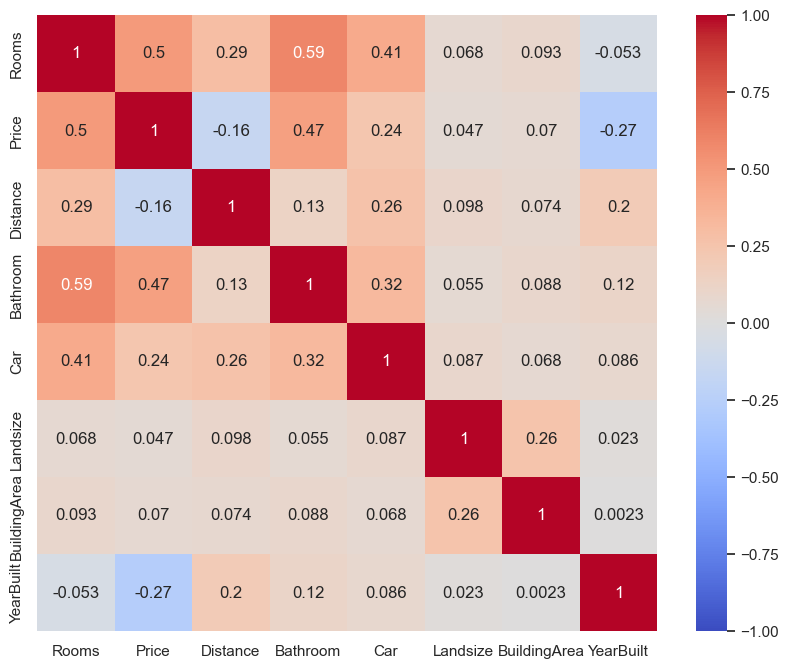

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing_model.corr(numeric_only=True), annot=True, vmin= -1, vmax=1, cmap='coolwarm')

## Exploring Feature to Target Relationships

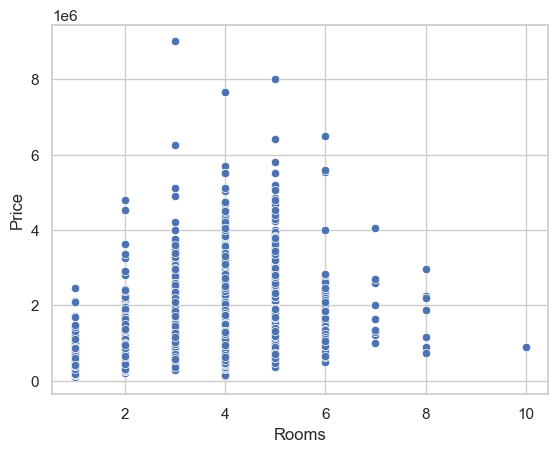

In [78]:
sns.scatterplot(housing_model, x='Rooms', y='Price');

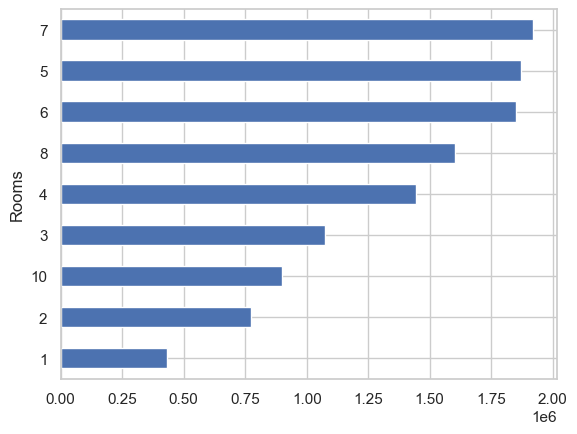

In [79]:
housing_model.groupby('Rooms')['Price'].mean().sort_values().plot.barh();

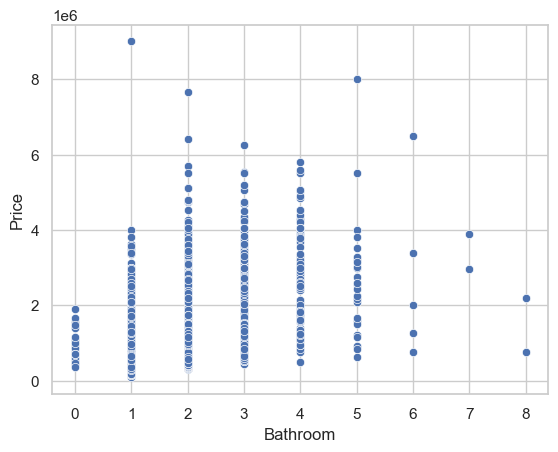

In [80]:
sns.scatterplot(housing_model, x='Bathroom', y='Price');

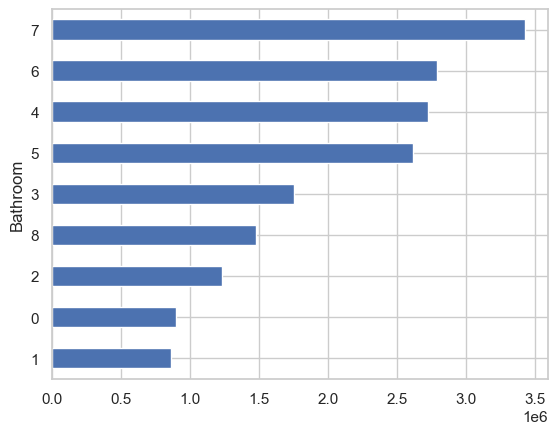

In [81]:
housing_model.groupby('Bathroom')['Price'].mean().sort_values().plot.barh();

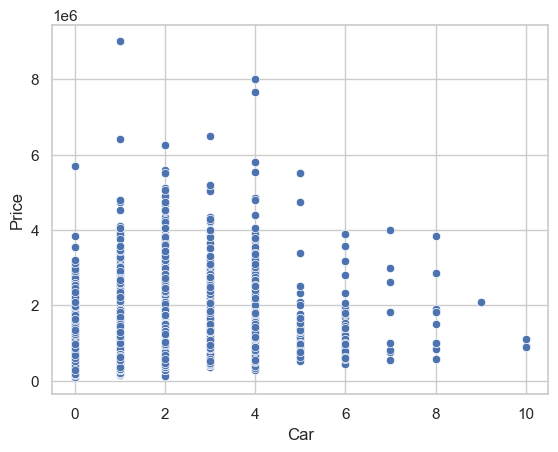

In [82]:
sns.scatterplot(housing_model, x='Car', y='Price');

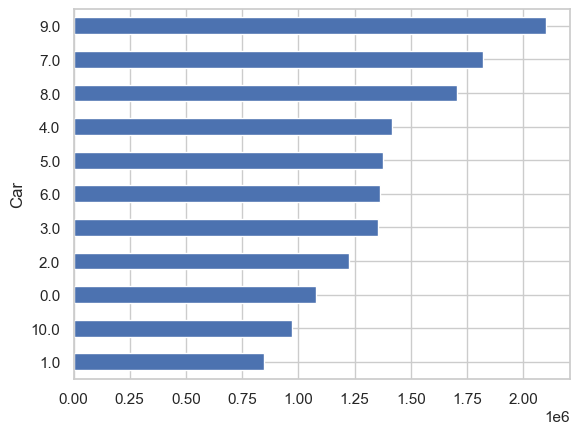

In [83]:
housing_model.groupby('Car')['Price'].mean().sort_values().plot.barh();

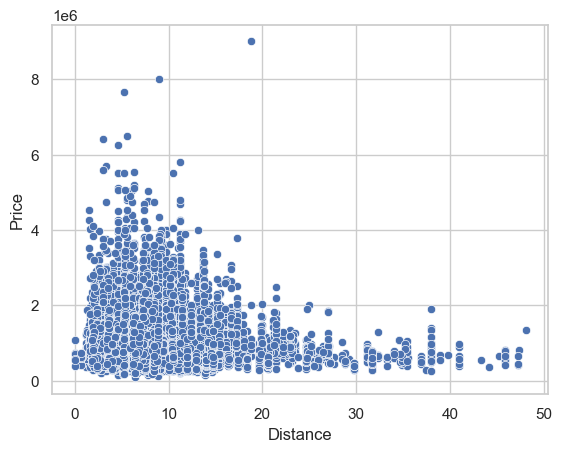

In [84]:
sns.scatterplot(housing_model, x='Distance', y='Price');

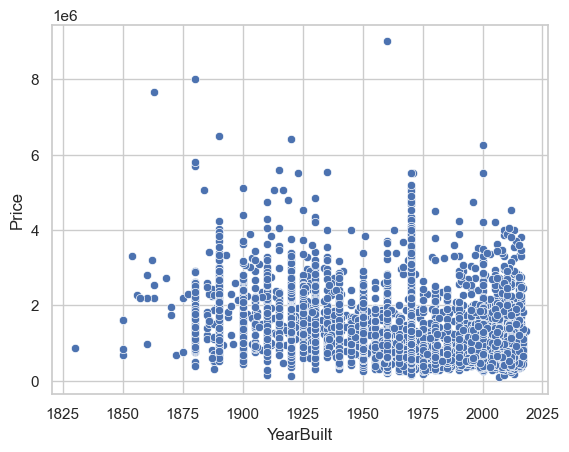

In [85]:
sns.scatterplot(housing_model, x='YearBuilt', y='Price');

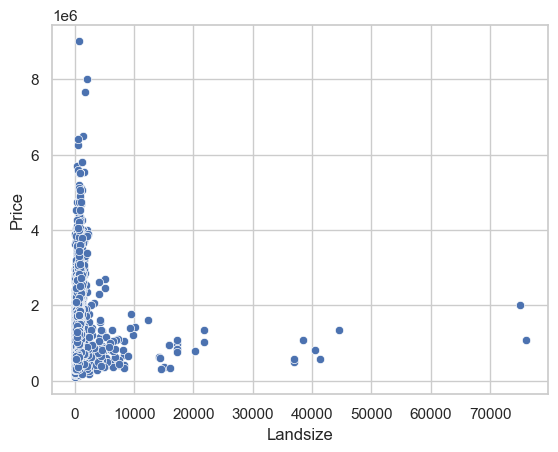

In [86]:
sns.scatterplot(housing_model, x='Landsize', y='Price');

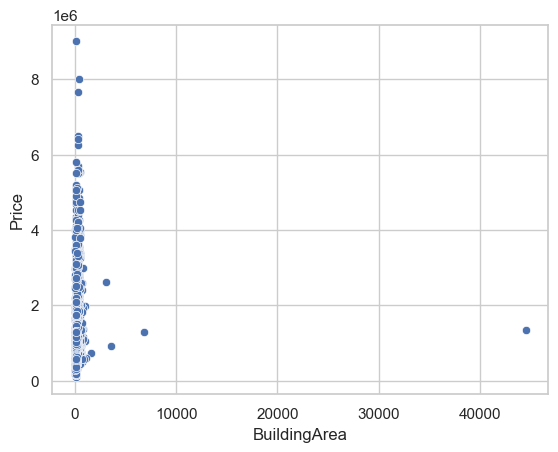

In [87]:
sns.scatterplot(housing_model, x='BuildingArea', y='Price');

In [88]:
housing_model.loc[housing['BuildingArea'] > 40000]

,Regionname,Rooms,Type,Method,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
13243,Northern Victoria,5,h,S,1355000,48.1,3,5.0,44500.0,44515.0,1970.0,Moreland


In [89]:
building_area_value_to_drop = 44515.0

housing_model = housing_model.drop(housing_model[housing_model['BuildingArea'] == building_area_value_to_drop].index)

housing_model.reset_index(drop=True, inplace=True)

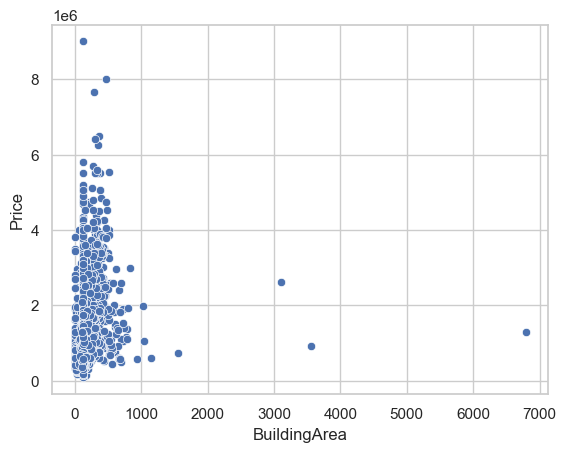

In [90]:
sns.scatterplot(housing_model, x='BuildingArea', y='Price');

In [91]:
housing_model.loc[housing['Landsize'] > 70000]

,Regionname,Rooms,Type,Method,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
687,Southern Metropolitan,3,h,VB,2000000,9.2,1,2.0,75100.0,126.0,1970.0,Boroondara
10503,Eastern Victoria,3,h,S,1085000,34.6,2,2.0,76000.0,126.0,1970.0,Yarra Ranges


In [92]:
landsize_values_to_drop = [75100.0, 76000.0]

housing_model = housing_model[~housing_model['Landsize'].isin(landsize_values_to_drop)]

housing_model.reset_index(drop=True, inplace=True)

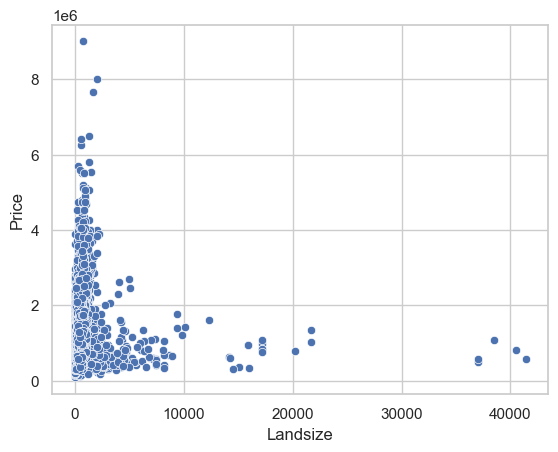

In [93]:
sns.scatterplot(housing_model, x='Landsize', y='Price');

## Exploring Feature to Feature Relationships

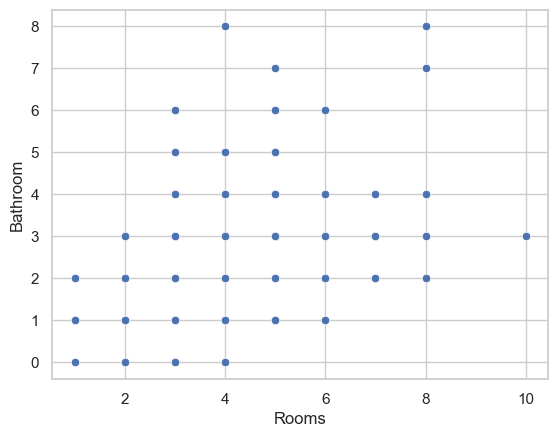

In [94]:
sns.scatterplot(housing_model, x='Rooms', y='Bathroom');

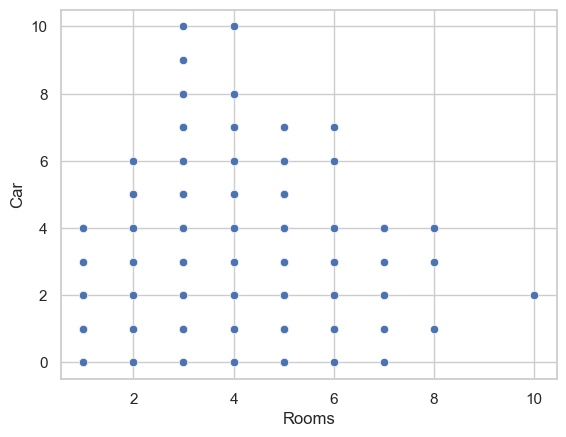

In [95]:
sns.scatterplot(housing_model, x='Rooms', y='Car');

## Summary: 

**`Features(Predictors):`**

- `Rooms:` This variables has a moderate positive correlation with the target variables `Price` `(0.497)`.
- `Distance:` Shown the positive correlation with `Price` `(0.108)`, indicating some influence on price, even though it's not very strong. 
- `Bathroom:` This variable has a strong positive correlation with `Price` `(0.467)`.
- `Car:` Car space has a moderate positive correlation with `Price` `(0.239)`.
- `Landsize:` Landsize has a very week correlation with `Price` `(0.047)`, indicating that it is not gonna be a strong predictors. But we'll compare it without including `Low Correlation Features`.
- `BuildingArea:` Similar to landsize, building area has a weak correlation with `Price` (0.070).
- `YearBuilt:` Year built has a negative correlation with `Price` `(-0.266)`, indicating some influence on price, but it's still considered a moderate correlation even though it's negative. 


**`Target:`**

- `Price` This is the only target variables that is suitable for it's purpose of predicticting `Melbourne Housing`. 

In [96]:
X = sm.add_constant(housing_model['Rooms'])
y = housing_model['Price']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4447.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:32:22   Log-Likelihood:            -1.9881e+05
No. Observations:               13575   AIC:                         3.976e+05
Df Residuals:                   13573   BIC:                         3.976e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.935e+04   1.54e+04      6.455      0.000    6.92e+04     1.3e+05
Rooms       3.323e+05   4982.187     66.689      0.000    3.22e+05    3.42e+05
==============================================================================
Omnibus:                     7052.228   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94896.705
Skew:                           2.183   Prob(JB):                         0.00
Kurtosis:                      15.195   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {rmse(y, model.predict(), squared=False)}")
print(f"R2: {r2(y, model.predict())}")

MAE: 386293.8984625115
RMSE: 554741.4258775411
R2: 0.24680046417530743


Before `(without np.log)`: 
- MAE: 386314.41270341596
- RMSE: 554745.3011662315
- R2: 0.2467501795713527

After `(with np.log)`:
- MAE: 0.3494624483719978
- RMSE: 0.4364207121034852
- R2: 0.3134895317264704

In [98]:
model.predict([1, 1])

array([431606.6947661])

In [99]:
simple_reg_residual = pd.DataFrame(
    {
        'Rooms': housing_model['Rooms'],
        'Price': housing_model['Price'],
        'Predicted Price': model.predict(),
        'Residual': model.resid
    }
)
simple_reg_residual.head()

,Rooms,Price,Predicted Price,Residual
0,2,1480000,7.638651e+05,716134.926250
1,2,1035000,7.638651e+05,271134.926250
2,3,1465000,1.096123e+06,368876.547266
3,3,850000,1.096123e+06,-246123.452734
4,4,1600000,1.428382e+06,171618.168282


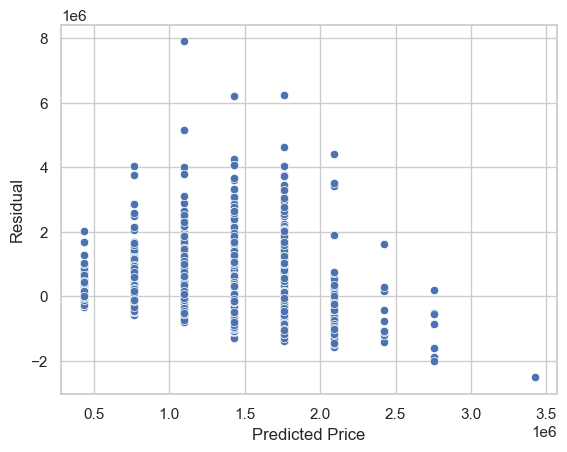

In [100]:
sns.scatterplot(simple_reg_residual, x='Predicted Price', y='Residual');

### Overall Summary: 

- With the original price without `np.log` the `R-Squared` show the number of `0.247`. But, with `np.log` our `R-Squared` are actually incrasing it's number to `0.313` which is about roughly `26.72%` increased of predicting the target (Price). 
- Our model has predict it's price giving a house with one room which estimates for about `$431,764`. 
- Our `F-Statistic` and `P-Value` are < 0.05. Which mean the `Rooms` is a good predictor of a Housing `Price`.
- It looks like our model over predicts as the `Price` of a `Rooms` increases. 

***Note that, this prediction needs more further assist. Since this is the simple linear regression, We'll cover much more once we're in*** `Multiple Linear Regression`.

<br>

# Feature Engineering

In [101]:
housing_model['Rooms_binary'] = np.where(housing_model['Rooms'] > 0, 1, 0)
housing_model['Type_binary'] = np.where(housing_model['Type'] == 'h', 1, 0)
housing_model['Method_binary'] = np.where(housing_model['Method'] == 'S', 1, 0)
housing_model['Distance_binary'] = np.where(housing_model['Distance'] <= 15.0, 1, 0)
housing_model['Bathroom_binary'] = np.where(housing_model['Bathroom'] > 0, 1, 0)
housing_model['Car_binary'] = np.where(housing_model['Car'] > 0, 1, 0)

housing_model.head()

,Regionname,Rooms,Type,Method,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Rooms_binary,Type_binary,Method_binary,Distance_binary,Bathroom_binary,Car_binary
0,Northern Metropolitan,2,h,S,1480000,2.5,1,1.0,202.0,126.0,1970.0,Yarra,1,1,1,1,1,1
1,Northern Metropolitan,2,h,S,1035000,2.5,1,0.0,156.0,79.0,1900.0,Yarra,1,1,1,1,1,0
2,Northern Metropolitan,3,h,SP,1465000,2.5,2,0.0,134.0,150.0,1900.0,Yarra,1,1,0,1,1,0
3,Northern Metropolitan,3,h,PI,850000,2.5,2,1.0,94.0,126.0,1970.0,Yarra,1,1,0,1,1,1
4,Northern Metropolitan,4,h,VB,1600000,2.5,1,2.0,120.0,142.0,2014.0,Yarra,1,1,0,1,1,1


<br>

# Multiple Linear Regression 

In [102]:
housing_model['Rooms_sq'] = housing['Rooms'] ** 2
housing_model['Distance_sq'] = housing['Distance'] ** 2
housing_model['Landsize_sq'] = housing['Landsize'] ** 2

features = ['Rooms',
            'Rooms_sq',
            'Type_binary',
            'Method_binary', 
            'Distance',
            'Distance_sq',
            'Bathroom', 
            'Car',
            'Landsize',
            'Landsize_sq',
            'BuildingArea',
            'YearBuilt']

X = sm.add_constant(housing_model[features])

y = np.log(housing_model['Price'])

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1459.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:32:23   Log-Likelihood:                -4934.0
No. Observations:               13575   AIC:                             9894.
Df Residuals:                   13562   BIC:                             9992.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.4563      0.232     79.440      0.000      18.001      18.912
Rooms             0.1709      0.005     35.976      0.000       0.162       0.180
Rooms_sq          0.0020      0.001      4.012      0.000       0.001       0.003
Type_binary       0.3151      0.008     38.148      0.000       0.299       0.331
Method_binary     0.0926      0.006     14.494      0.000       0.080       0.105
Distance         -0.0306      0.001    -49.444      0.000      -0.032      -0.029
Distance_sq   -3.906e-06   1.76e-05     -0.222      0.825   -3.85e-05    3.07e-05
Bathroom          0.1855      0.006     32.898      0.000       0.174       0.197
Car               0.0379      0.004     10.790      0.000       0.031       0.045
Landsize       9.772e-06   2.77e-06      3.521      0.000    4.33e-06    1.52e-05
Landsize_sq    -9.47e-12   3.86e-11     -0.245      0.806   -8.51e-11    6.62e-11
BuildingArea      0.0004   3.39e-05     12.009      0.000       0.000       0.000
YearBuilt        -0.0029      0.000    -24.105      0.000      -0.003      -0.003
==============================================================================
Omnibus:                      296.678   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.921
Skew:                           0.132   Prob(JB):                    5.87e-128
Kurtosis:                       3.983   Cond. No.                     6.05e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
model.predict([1, 2, 2, 1, 1, 2.5, 2.5, 1, 0.0, 156.0, 156.0, 79.0, 1900.0])

array([13.93484201])

In [104]:
print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {rmse(y, model.predict(), squared=False)}")
print(f"R2: {r2(y, model.predict())}")

MAE: 0.27511588637982726
RMSE: 0.34802583570968804
R2: 0.5634344587983839


## Multiple Linear Regression Model Fitting Summary:

- The model was fitted using the following features: `'Rooms'`, `'Rooms_sq'`, `'Type_binary'`, `'Method_binary'`, `'Distance'`, `'Distance_sq'`, `'Bathroom'`, `'Car'`, `'Landsize'`, `'Landsize_sq'`, `'BuildingArea'`, and `'YearBuilt'`.
- The target variable 'Price' was transformed by taking the natural logarithm (log) to meet the linear regression assumptions.
- The model achieved the following performance metrics:
    - `Mean Absolute Error (MAE)`: 0.27511588637982726
    - `Root Mean Squared Error (RMSE)`: 0.34802583570968804
    - `R-squared (R2)`: 0.5634344587983839
- The feature values for the prediction were as follows:
    - `Rooms`: 2
    - `Rooms_sq`: 2
    - `Type_binary`: 1
    - `Method_binary`: 1
    - `Distance`: 2.5
    - `Distance_sq`: 2.5
    - `Bathroom`: 1
    - `Car`: 0.0
    - `Landsize`: 156.0
    - `Landsize_sq`: 156.0
    - `BuildingArea`: 79.0
    - `YearBuilt`: 1900
- The model prediction for the given feature values was approximately `13.934`.

The `R-squared` value of `0.563` indicates that the model explains approximately `56%` of the variability in housing prices `based on the selected features`. The `MAE` and `RMSE` `provide measures of the model's prediction errors`, with `lower values` indicating `better performance`.

***Keep in mind that this is just a single prediction, and the model can be used to make predictions for various sets of feature values based on the relationships it has learned from the data.***

<br>

# Model Assumptions

### Linearity

In this section, our model seems to have the performing linearity issues. With R-Squared of `0.580` and `P>|t|` less than 0.05. 

### Normality of Errors

In [105]:
# Without 'np.log'
features = ['Rooms',
            'Rooms_sq',
            'Type_binary',
            'Method_binary', 
            'Distance',
#             'Distance_sq',
            'Bathroom', 
            'Car',
            'Landsize',
#             'Landsize_sq',
            'BuildingArea',
            'YearBuilt']

X = sm.add_constant(housing_model[features])

y = housing_model['Price']

model_or = sm.OLS(y, X).fit()

model_or.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1248.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:32:23   Log-Likelihood:            -1.9630e+05
No. Observations:               13575   AIC:                         3.926e+05
Df Residuals:                   13564   BIC:                         3.927e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.688e+06   3.08e+05     24.972      0.000    7.08e+06    8.29e+06
Rooms          1.593e+05   6294.426     25.311      0.000    1.47e+05    1.72e+05
Rooms_sq       2813.8971    662.134      4.250      0.000    1516.023    4111.772
Type_binary    2.677e+05   1.09e+04     24.456      0.000    2.46e+05    2.89e+05
Method_binary   6.54e+04   8465.277      7.725      0.000    4.88e+04     8.2e+04
Distance      -3.447e+04    756.037    -45.599      0.000    -3.6e+04    -3.3e+04
Bathroom       2.774e+05   7472.615     37.119      0.000    2.63e+05    2.92e+05
Car            4.905e+04   4648.627     10.551      0.000    3.99e+04    5.82e+04
Landsize         14.8420      3.676      4.037      0.000       7.636      22.048
BuildingArea    629.8217     44.947     14.012      0.000     541.719     717.925
YearBuilt     -3856.7614    156.752    -24.604      0.000   -4164.017   -3549.506
==============================================================================
Omnibus:                     7656.960   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192271.204
Skew:                           2.219   Prob(JB):                         0.00
Kurtosis:                      20.895   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

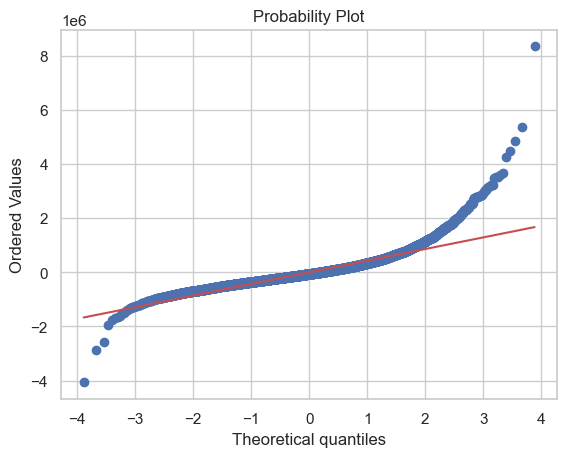

In [106]:
# Without using 'np.log' transformation 
stats.probplot(model_or.resid, dist='norm', plot=plt);

In [107]:
# With 'np.log'
features = ['Rooms',
            'Rooms_sq',
            'Type_binary',
            'Method_binary', 
            'Distance',
#             'Distance_sq',
            'Bathroom', 
            'Car',
            'Landsize',
#             'Landsize_sq',
            'BuildingArea',
            'YearBuilt']

X = sm.add_constant(housing_model[features])

y = np.log(housing_model['Price'])

model_log = sm.OLS(y, X).fit()

model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1751.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:32:23   Log-Likelihood:                -4934.0
No. Observations:               13575   AIC:                             9890.
Df Residuals:                   13564   BIC:                             9973.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.4563      0.232     79.455      0.000      18.001      18.912
Rooms             0.1709      0.005     35.987      0.000       0.162       0.180
Rooms_sq          0.0020      0.000      4.012      0.000       0.001       0.003
Type_binary       0.3151      0.008     38.151      0.000       0.299       0.331
Method_binary     0.0926      0.006     14.494      0.000       0.080       0.105
Distance         -0.0307      0.001    -53.817      0.000      -0.032      -0.030
Bathroom          0.1855      0.006     32.899      0.000       0.174       0.197
Car               0.0378      0.004     10.789      0.000       0.031       0.045
Landsize       9.759e-06   2.77e-06      3.518      0.000    4.32e-06    1.52e-05
BuildingArea      0.0004   3.39e-05     12.018      0.000       0.000       0.000
YearBuilt        -0.0029      0.000    -24.108      0.000      -0.003      -0.003
==============================================================================
Omnibus:                      296.722   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.096
Skew:                           0.132   Prob(JB):                    5.38e-128
Kurtosis:                       3.983   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

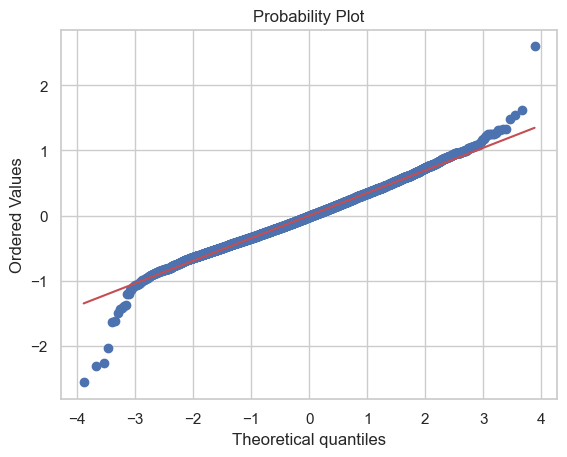

In [108]:
# With 'np.log' transformation for Price
stats.probplot(model_log.resid, dist='norm', plot=plt);

There are some residuals left, but afterall they didnt violate the normality assumption. 

In [109]:
# [Constant, Rooms, Rooms_sq, Type_binary, Method_binary, Distance, Bathroom, Car, Landsize, BuildingArea, YearBuilt]
house_exp = [1, 2, 2**2, 1, 1, 2.5, 1, 0.0, 156.0, 79.0, 1900.0]

np.exp(model_log.predict(house_exp))

array([1131193.24468952])

A House with this features is predicted to cost `$1,131,193`

### No Perfect Multicollinerarity

In [110]:
variables = sm.OLS(y, X).exog

pd.Series([vif(variables, i) for i in range(variables.shape[1])], index=X.columns)

const            6042.418462
Rooms               2.307216
Rooms_sq            1.054789
Type_binary         1.617475
Method_binary       1.018611
Distance            1.249790
Bathroom            1.702527
Car                 1.270365
Landsize            1.017239
BuildingArea        1.134773
YearBuilt           1.257332
dtype: float64

As for the result of `VIF` testing our features are `acceptable` and `do not raise major concerns`. So we're gonna leave it as it is.

### Equal Variance of Errors

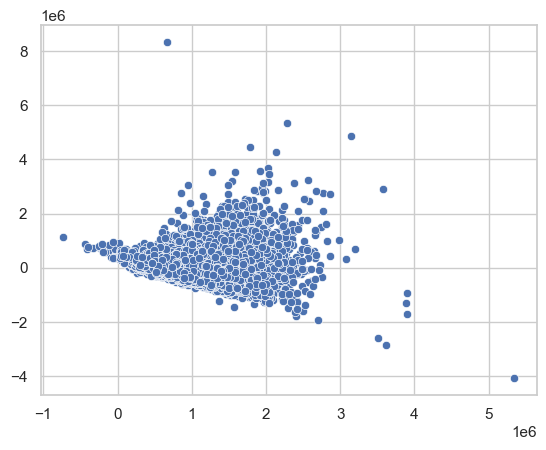

In [111]:
# Before performing the Log transformation
sns.scatterplot(x=model_or.predict(), y=model_or.resid);

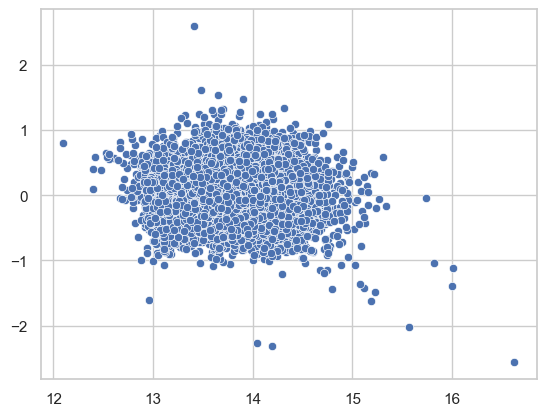

In [112]:
# After performing the Log transformation
sns.scatterplot(x=model_log.predict(), y=model_log.resid);

As it turns out our `Price` errors are spread more evenly now after perform Log transformation towards our `Price`. 

### Outliers & Influence

In [113]:
influence = model_log.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head(2)

,dfb_const,dfb_Rooms,dfb_Rooms_sq,dfb_Type_binary,dfb_Method_binary,dfb_Distance,dfb_Bathroom,dfb_Car,dfb_Landsize,dfb_BuildingArea,dfb_YearBuilt,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.008980,-0.008732,-0.006336,0.016330,0.006891,-0.012959,-0.001131,-0.002062,-0.001436,0.001693,0.009611,0.000065,1.180523,0.000513,0.026753,1.180540,0.026753
1,-0.003894,0.001594,0.001179,-0.001747,-0.001374,0.000915,-0.001001,0.002450,0.000168,0.000666,0.003750,0.000005,-0.255355,0.000789,-0.007176,-0.255347,-0.007176


In [114]:
inf_summary_df['cooks_d'].sort_values(ascending=False).head()

1483    6.112083
2559    0.236769
5193    0.082131
1587    0.080104
3941    0.044203
Name: cooks_d, dtype: float64

In [115]:
housing_model.loc[[1483]]

,Regionname,Rooms,Type,Method,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Rooms_binary,Type_binary,Method_binary,Distance_binary,Bathroom_binary,Car_binary,Rooms_sq,Distance_sq,Landsize_sq
1483,Eastern Metropolitan,4,h,S,1280000,11.8,1,2.0,732.0,6791.0,1970.0,Manningham,1,1,1,1,1,1,9,139.24,93636.0


In [116]:
housing_model.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Rooms_binary,Type_binary,Method_binary,Distance_binary,Bathroom_binary,Car_binary,Rooms_sq,Distance_sq,Landsize_sq
count,13575.000000,1.357500e+04,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.0,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,1.357500e+04
mean,2.937827,1.075466e+06,10.133540,1.534070,1.611418,512.255617,136.369749,1966.844052,1.0,0.695691,0.664457,0.879190,0.997495,0.924420,9.544383,137.239526,2.429713e+06
std,0.955759,6.392218e+05,5.856476,0.691568,0.960285,1086.572371,93.866622,28.331715,0.0,0.460131,0.472197,0.325919,0.049985,0.264335,6.143243,191.104148,7.780053e+07
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,2.000000,6.500000e+05,6.100000,1.000000,1.000000,176.500000,122.000000,1960.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,37.210000,3.115250e+04
50%,3.000000,9.025000e+05,9.200000,1.000000,2.000000,440.000000,126.000000,1970.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,84.640000,1.936000e+05
75%,3.000000,1.330000e+06,13.000000,2.000000,2.000000,651.000000,129.960000,1975.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,169.000000,4.238010e+05
max,10.000000,9.000000e+06,47.400000,8.000000,10.000000,41400.000000,6791.000000,2018.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,2313.610000,5.776000e+09


With the `cooks_distance` analysis we can conclude that our index of `1483` has the score of > `5` even with a score of `0.5` is still considered to investigate more further. With that being said, we'll try to compare using the outlier and without outlier, to inspect if there's going to have a bigger impact on our model. 

<br> 

## Comparing the Model without Outliers

In [117]:
housing_model_no_outlier = housing_model.drop(index=1483).copy()

housing_model_no_outlier.reset_index(drop=True, inplace=True)

features = ['Rooms', 
            'Rooms_sq', 
            'Type_binary', 
            'Method_binary', 
            'Distance',
#             'Distance_sq', 
            'Bathroom', 
            'Car', 
            'Landsize', 
#             'Landsize_sq', 
            'BuildingArea', 
            'YearBuilt']


X_no_outlier = sm.add_constant(housing_model_no_outlier[features])
y_no_outlier = np.log(housing_model_no_outlier['Price'])

model_no_outlier = sm.OLS(y_no_outlier, X_no_outlier).fit()

model_no_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1772.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:33:50   Log-Likelihood:                -4887.4
No. Observations:               13574   AIC:                             9797.
Df Residuals:                   13563   BIC:                             9880.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.4582      0.231     79.734      0.000      18.004      18.912
Rooms             0.1671      0.005     35.179      0.000       0.158       0.176
Rooms_sq          0.0019      0.000      3.881      0.000       0.001       0.003
Type_binary       0.3116      0.008     37.822      0.000       0.295       0.328
Method_binary     0.0927      0.006     14.561      0.000       0.080       0.105
Distance         -0.0307      0.001    -53.924      0.000      -0.032      -0.030
Bathroom          0.1779      0.006     31.365      0.000       0.167       0.189
Car               0.0373      0.003     10.669      0.000       0.030       0.044
Landsize        9.62e-06   2.76e-06      3.480      0.001     4.2e-06     1.5e-05
BuildingArea      0.0007   4.43e-05     15.459      0.000       0.001       0.001
YearBuilt        -0.0029      0.000    -24.246      0.000      -0.003      -0.003
==============================================================================
Omnibus:                      289.986   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.529
Skew:                           0.128   Prob(JB):                    1.29e-124
Kurtosis:                       3.971   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
variables = sm.OLS(y_no_outlier, X_no_outlier).exog

pd.Series([vif(variables, i) for i in range(variables.shape[1])], index=X.columns)

const            6041.977740
Rooms               2.323091
Rooms_sq            1.055022
Type_binary         1.620519
Method_binary       1.018576
Distance            1.249858
Bathroom            1.735292
Car                 1.270679
Landsize            1.017263
BuildingArea        1.230007
YearBuilt           1.257374
dtype: float64

In [119]:
influence = model_no_outlier.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head(2)

,dfb_const,dfb_Rooms,dfb_Rooms_sq,dfb_Type_binary,dfb_Method_binary,dfb_Distance,dfb_Bathroom,dfb_Car,dfb_Landsize,dfb_BuildingArea,dfb_YearBuilt,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.008912,-0.008767,-0.006311,0.016123,0.006842,-0.012849,-0.001327,-0.002071,-0.001433,0.002291,0.009530,0.000064,1.171665,0.000515,0.026598,1.171681,0.026598
1,-0.003574,0.001414,0.001074,-0.001625,-0.001261,0.000844,-0.000983,0.002240,0.000152,0.000808,0.003439,0.000004,-0.234389,0.000794,-0.006608,-0.234380,-0.006608


In [120]:
inf_summary_df['cooks_d'].sort_values(ascending=False).head()

2558    1.311975
1586    0.498630
5192    0.081586
3940    0.043925
4978    0.036063
Name: cooks_d, dtype: float64

### Summary: 

In summary, there isn't that much of impact for the R-Squared hence the increasing point are up to `0.003` only. But since there's some small improvement in R-Squared i've decided to use the `housing_model` dataset without outliers for futher analysis. And our `Model Assumption` are all in acceptable form, We should move on into the `Modeling Testing & Validation` to scoring our model. 

<br>

# Model Testing & Validation

## Binary Column Explanation: 

- `Type_binary:` This column has a value of 1 when the `Type` is 'h' (indicating a house), and it's 0 otherwise.
- `Method_binary:` This column takes on the value 1 when the `Method` is 'S' (representing a property sold), and it's 0 otherwise.

`**Notes:**`
In other words, I'm choosing the columns that were included in the model we built earlier. These columns will be used to run several tests and assessments, such as checking for `Overfitting`, examining the `Bias-Variance Tradeoff`, conducting `Validation`, and performing `Cross-Validation` on our model.

In [121]:
housing_model_no_outlier.head()

,Regionname,Rooms,Type,Method,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Rooms_binary,Type_binary,Method_binary,Distance_binary,Bathroom_binary,Car_binary,Rooms_sq,Distance_sq,Landsize_sq
0,Northern Metropolitan,2,h,S,1480000,2.5,1,1.0,202.0,126.0,1970.0,Yarra,1,1,1,1,1,1,4,6.25,40804.0
1,Northern Metropolitan,2,h,S,1035000,2.5,1,0.0,156.0,79.0,1900.0,Yarra,1,1,1,1,1,0,4,6.25,24336.0
2,Northern Metropolitan,3,h,SP,1465000,2.5,2,0.0,134.0,150.0,1900.0,Yarra,1,1,0,1,1,0,9,6.25,17956.0
3,Northern Metropolitan,3,h,PI,850000,2.5,2,1.0,94.0,126.0,1970.0,Yarra,1,1,0,1,1,1,9,6.25,8836.0
4,Northern Metropolitan,4,h,VB,1600000,2.5,1,2.0,120.0,142.0,2014.0,Yarra,1,1,0,1,1,1,16,6.25,14400.0


In [122]:
columns_to_select = ['Rooms', 
                     'Rooms_sq', 
                     'Price',
                     'Type_binary', 
                     'Method_binary', 
                     'Distance',
                     'Bathroom', 
                     'Car', 
                     'Landsize', 
                     'BuildingArea', 
                     'YearBuilt']

housing_models = housing_model[columns_to_select].copy()

housing_models.head()

,Rooms,Rooms_sq,Price,Type_binary,Method_binary,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2,4,1480000,1,1,2.5,1,1.0,202.0,126.0,1970.0
1,2,4,1035000,1,1,2.5,1,0.0,156.0,79.0,1900.0
2,3,9,1465000,1,0,2.5,2,0.0,134.0,150.0,1900.0
3,3,9,850000,1,0,2.5,2,1.0,94.0,126.0,1970.0
4,4,16,1600000,1,0,2.5,1,2.0,120.0,142.0,2014.0


In [123]:
housing_models.describe()

,Rooms,Rooms_sq,Price,Type_binary,Method_binary,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,13575.000000,13575.000000,1.357500e+04,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000
mean,2.937827,9.544383,1.075466e+06,0.695691,0.664457,10.133540,1.534070,1.611418,512.255617,136.369749,1966.844052
std,0.955759,6.143243,6.392218e+05,0.460131,0.472197,5.856476,0.691568,0.960285,1086.572371,93.866622,28.331715
min,1.000000,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000
25%,2.000000,4.000000,6.500000e+05,0.000000,0.000000,6.100000,1.000000,1.000000,176.500000,122.000000,1960.000000
50%,3.000000,9.000000,9.025000e+05,1.000000,1.000000,9.200000,1.000000,2.000000,440.000000,126.000000,1970.000000
75%,3.000000,9.000000,1.330000e+06,1.000000,1.000000,13.000000,2.000000,2.000000,651.000000,129.960000,1975.000000
max,10.000000,100.000000,9.000000e+06,1.000000,1.000000,47.400000,8.000000,10.000000,41400.000000,6791.000000,2018.000000


In [124]:
housing_models = housing_models.drop(index=1483).copy()

housing_models.reset_index(drop=True, inplace=True)

In [125]:
housing_models.head()

,Rooms,Rooms_sq,Price,Type_binary,Method_binary,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2,4,1480000,1,1,2.5,1,1.0,202.0,126.0,1970.0
1,2,4,1035000,1,1,2.5,1,0.0,156.0,79.0,1900.0
2,3,9,1465000,1,0,2.5,2,0.0,134.0,150.0,1900.0
3,3,9,850000,1,0,2.5,2,1.0,94.0,126.0,1970.0
4,4,16,1600000,1,0,2.5,1,2.0,120.0,142.0,2014.0


In [126]:
housing_models.describe()

,Rooms,Rooms_sq,Price,Type_binary,Method_binary,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,13574.000000,13574.000000,1.357400e+04,13574.000000,13574.000000,13574.000000,13574.000000,13574.000000,13574.000000,13574.000000,13574.000000
mean,2.937749,9.544423,1.075451e+06,0.695668,0.664432,10.133417,1.534109,1.611389,512.239428,135.879501,1966.843819
std,0.955751,6.143467,6.392429e+05,0.460141,0.472206,5.856674,0.691579,0.960315,1086.610760,74.489530,28.332746
min,1.000000,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000
25%,2.000000,4.000000,6.500000e+05,0.000000,0.000000,6.100000,1.000000,1.000000,176.250000,122.000000,1960.000000
50%,3.000000,9.000000,9.022500e+05,1.000000,1.000000,9.200000,1.000000,2.000000,440.000000,126.000000,1970.000000
75%,3.000000,9.000000,1.330000e+06,1.000000,1.000000,13.000000,2.000000,2.000000,650.750000,129.865000,1975.000000
max,10.000000,100.000000,9.000000e+06,1.000000,1.000000,47.400000,8.000000,10.000000,41400.000000,3558.000000,2018.000000


## Data Splitting

In [127]:
housing_model_testing = housing_models.sample(10000)

features = ['Rooms', 
            'Rooms_sq', 
            'Type_binary', 
            'Method_binary', 
            'Distance',
            'Bathroom', 
            'Car', 
            'Landsize', 
            'BuildingArea', 
            'YearBuilt']

X = sm.add_constant(housing_model_testing[features])
y = np.log(housing_model_testing['Price'])

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state= 12345)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state= 12345)

print(
    f"Training Set Rows: {X.shape[0]}",
    f"Validation Set Rows: {X_valid.shape[0]}",
    f"Test Set Row: {X_test.shape[0]}"
)

Training Set Rows: 8000 Validation Set Rows: 2000 Test Set Row: 2000


## Model Tuning

In [128]:
model = sm.OLS(y_train, X_train).fit()

print(f'Training R2: {r2(y_train, model.predict(X_train))}')
print(f'Validation R2: {r2(y_valid, model.predict(X_valid))}')

Training R2: 0.5757685855082237
Validation R2: 0.573049265542262


In [129]:
print(f"Train R2: {r2(y_train, model.predict(X_train))}")
print(f"Train MAE: {mae(y_train, model.predict(X_train))}")
print(f"Validation R2: {r2(y_valid, model.predict(X_valid))}")
print(f"Validation MAE: {mae(y_valid, model.predict(X_valid))}")

Train R2: 0.5757685855082237
Train MAE: 0.2736956335677001
Validation R2: 0.573049265542262
Validation MAE: 0.274922232106173


## Model Scoring

In [130]:
# Final Test 
model = sm.OLS(y, X).fit()

print(f'Training R2: {r2(y, model.predict(X))}')
print(f'Test R2: {r2(y_test, model.predict(X_test))}')

Training R2: 0.5752689779871227
Test R2: 0.5348737983403911


In [131]:
model = sm.OLS(y_test, X_test).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:35:16   Log-Likelihood:                -740.73
No. Observations:                2000   AIC:                             1503.
Df Residuals:                    1989   BIC:                             1565.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.9184      0.613     29.223      0.000      16.716      19.121
Rooms             0.1670      0.013     13.282      0.000       0.142       0.192
Rooms_sq          0.0019      0.001      1.386      0.166      -0.001       0.005
Type_binary       0.3288      0.022     15.023      0.000       0.286       0.372
Method_binary     0.0851      0.017      5.010      0.000       0.052       0.118
Distance         -0.0317      0.001    -21.388      0.000      -0.035      -0.029
Bathroom          0.1925      0.015     12.920      0.000       0.163       0.222
Car               0.0343      0.009      3.827      0.000       0.017       0.052
Landsize        1.71e-07   1.01e-05      0.017      0.986   -1.96e-05       2e-05
BuildingArea      0.0003   8.45e-05      3.817      0.000       0.000       0.000
YearBuilt        -0.0026      0.000     -8.196      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       23.338   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.844
Skew:                           0.260   Prob(JB):                     6.64e-06
Kurtosis:                       3.127   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cross Validation Loop

In [132]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2


kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list 
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.544, 0.584, 0.592, 0.59, 0.551]
Cross Val R2s: 0.572 +- 0.02
All Validation MAEs:  [0.279, 0.267, 0.269, 0.272, 0.285]
Cross Val MAEs: 0.274 +- 0.007


## Conclusion: 

In overall Validation, our Training Data has the highest `R-Squared` of `.575` which indicating that it explains about `57.5%` of the variance in log-transformed house prices. This is a decent level of performance anyway.And on the other hand our `Validation Data` has it's score of `0.573` which is close to our `Training Data`, and for our `Test Data` the `R-Squared` score on the test dataset is approximately `0.535` which is the lowest among 3 of the Validation Test we just did.

And as for `Cross-Validation`, the result show that the model's performance is consistent across diffrent subsets of the data. The mean cross-validated R-Squared score is approximately around `0.572` with a small standard deviation, indicating robustness. 

The `MAE` results indicate that the model's predictions have a relatively low average absolute error, which leds us to the positive sign of productive accuracy. 

`Bias-Variance Tradeoff` conclude that, our model appears to strike a good balance between bias and variance, as evidenced by the consistent performance on training, validation and test sets. 


## Model Performance Summary:
In summary, the evaluation of our model's performance reveals the following key findings:

1. `Training Data Performance:`
- The training data achieved the highest R-squared (R2) score of approximately 0.575, signifying that it can explain around 57.5% of the variance in log-transformed house prices. This level of performance is considered decent.

2. `Validation Data Performance:`

- The validation data exhibited a competitive R2 score of approximately 0.573, closely mirroring the training data's performance. This indicates that the model maintains its predictive power on data it hasn't seen during training.

3. `Test Data Performance:`
- The R2 score on the test dataset, while slightly lower at approximately 0.535, still demonstrates the model's capability to make reasonable predictions on new, unseen data.

4. `Cross-Validation Insights:`
- Cross-validation results consistently reinforce the model's performance, with a mean cross-validated R2 score of roughly 0.572 and a small standard deviation. This suggests that the model is robust and reliable across different subsets of the data.

5. `Mean Absolute Error (MAE):`
- The model's predictions exhibit a relatively low average absolute error, highlighting its accuracy in estimating house prices.

6. `Bias-Variance Tradeoff Analysis:`
- Our model appears to strike an effective balance between bias and variance, as indicated by its consistent performance across training, validation, and test sets.